In [1]:
import numpy as np
import torch

# Step 1: Create a sample data array with NaN values
data = np.array([[1.0, 2.0, np.nan], 
                 [4.0, np.nan, 6.0], 
                 [7.0, 8.0, 9.0]])

# Step 2: Generate a mask for NaN values
mask = np.isnan(data)  # This identifies where NaN values are located

# Step 3: Convert the mask to a PyTorch boolean tensor
mask_torch = torch.BoolTensor(mask)  # PyTorch requires a boolean tensor

# Step 4: Create a tensor to represent H_hat_supervise (same shape as data)
H_hat_supervise = torch.tensor([[1.1, 2.2, 3.3], 
                                [4.4, 5.5, 6.6], 
                                [7.7, 8.8, 9.9]])

# Step 5: Apply the mask to H_hat_supervise to extract only non-NaN values
H_hat_supervise_masked = H_hat_supervise[~mask_torch]  # ~mask_torch inverts the mask to select non-NaN positions

# Step 6: Print results for verification
H_hat_supervise_masked, mask_torch, H_hat_supervise


(tensor([1.1000, 2.2000, 4.4000, 6.6000, 7.7000, 8.8000, 9.9000]),
 tensor([[False, False,  True],
         [False,  True, False],
         [False, False, False]]),
 tensor([[1.1000, 2.2000, 3.3000],
         [4.4000, 5.5000, 6.6000],
         [7.7000, 8.8000, 9.9000]]))

In [2]:
data_path="workdir/processd_day_futures/features/6E=F.parquet"
# read data
import pandas as pd
data=pd.read_parquet(data_path)
data.head()

,timestamp,open,high,low,close,adj_close,kmid,kmid2,klen,kup,...,vsumd_10,vsumd_20,vsumd_30,vsumd_60,log_volume,day,weekday,month,ret1,mov1
0,2000-09-12 00:00:00+00:00,0.8780,0.8780,0.8730,0.8730,0.8730,-0.005727,-1.000000,0.005695,0.000000,...,0.0,0.0,0.0,0.0,4.553877,1,3,1,0.004696,1
1,2000-09-13 00:00:00+00:00,0.8765,0.8771,0.8750,0.8771,0.8771,0.000684,0.285706,0.002396,0.000000,...,0.0,0.0,0.0,0.0,4.394449,1,3,1,-0.006385,0
2,2000-09-15 00:00:00+00:00,0.8715,0.8715,0.8715,0.8715,0.8715,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,4.709530,1,3,1,-0.004590,0
3,2000-09-18 00:00:00+00:00,0.8715,0.8715,0.8675,0.8675,0.8675,-0.004611,-1.000000,0.004590,0.000000,...,0.0,0.0,0.0,0.0,4.709530,1,3,1,-0.001153,0
4,2000-09-19 00:00:00+00:00,0.8715,0.8693,0.8635,0.8665,0.8665,-0.005770,-0.862067,0.006655,-0.002524,...,0.0,0.0,0.0,0.0,4.709530,1,3,1,-0.004616,0


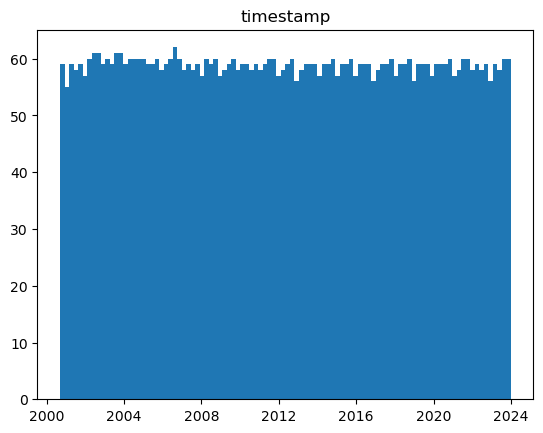

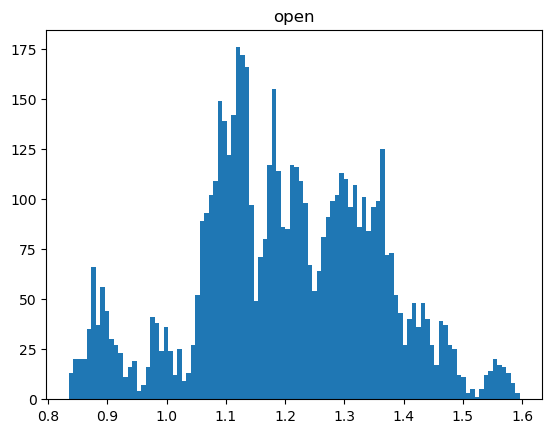

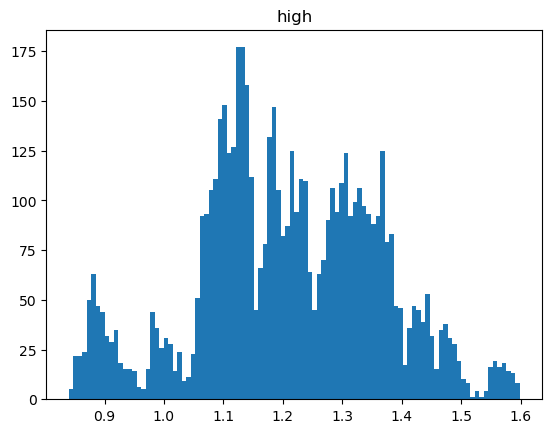

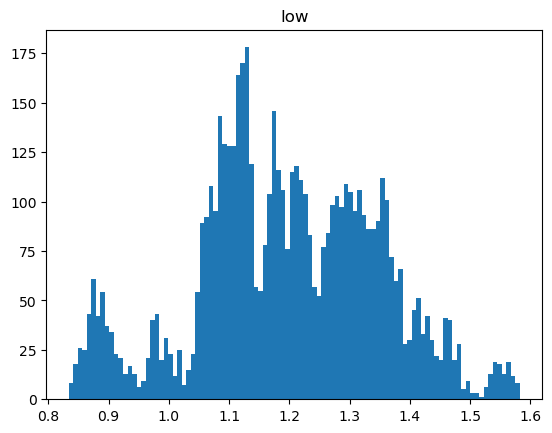

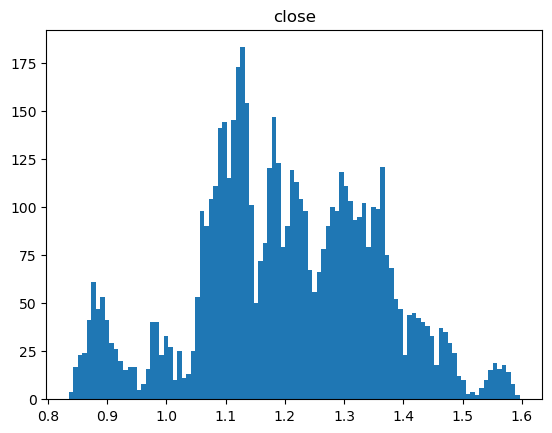

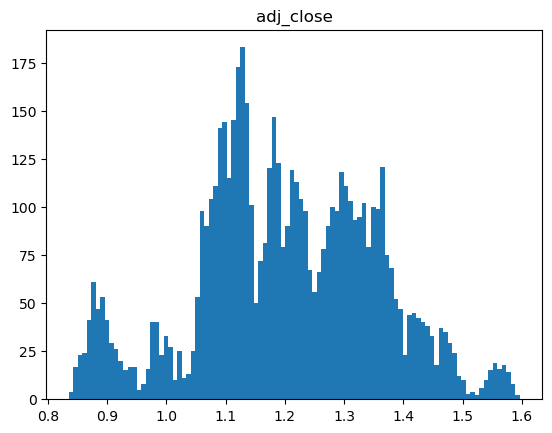

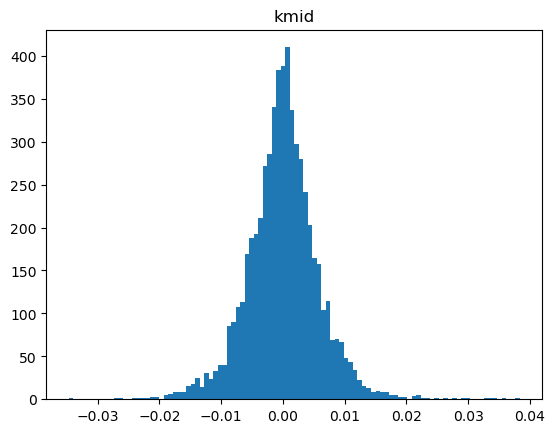

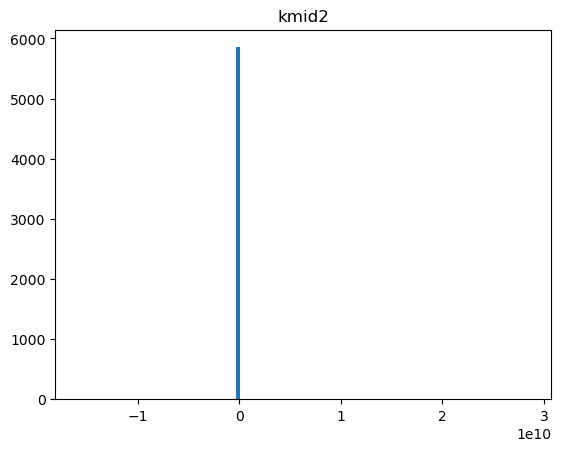

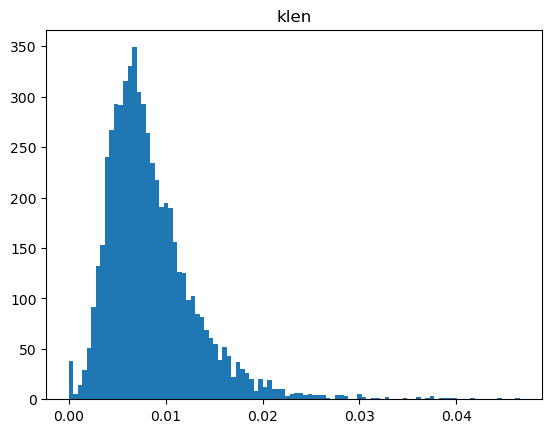

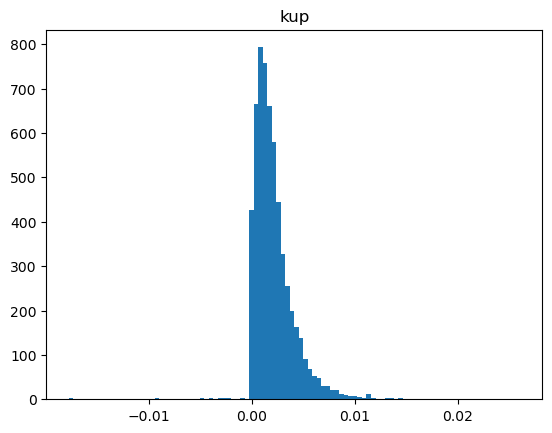

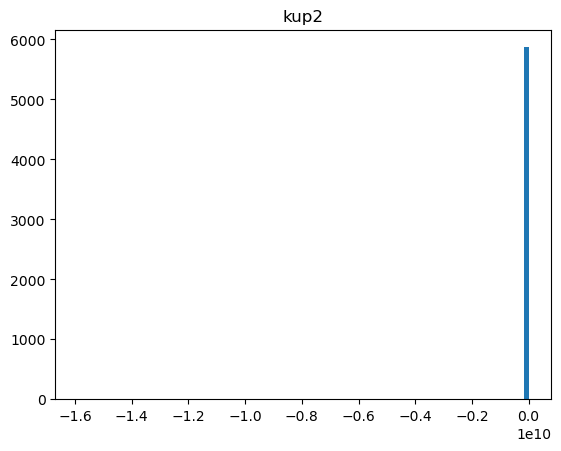

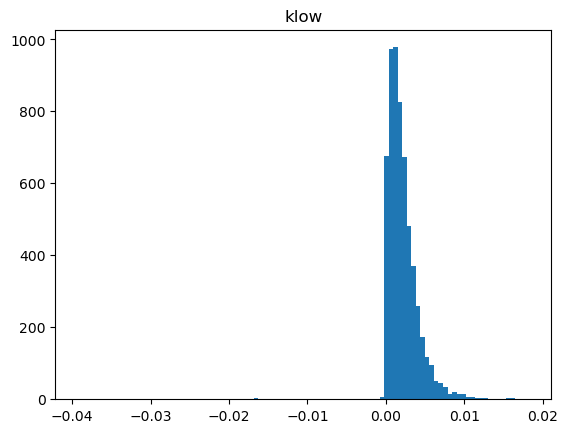

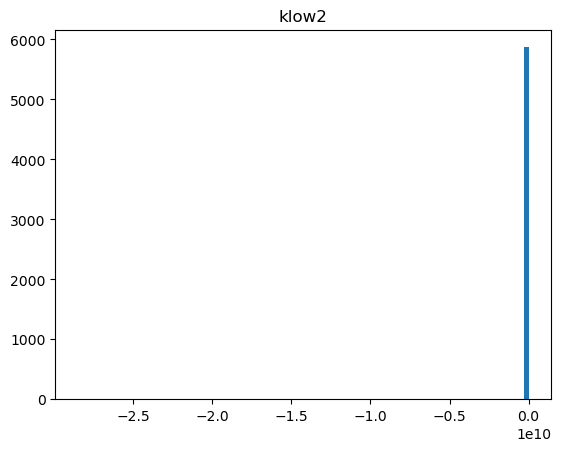

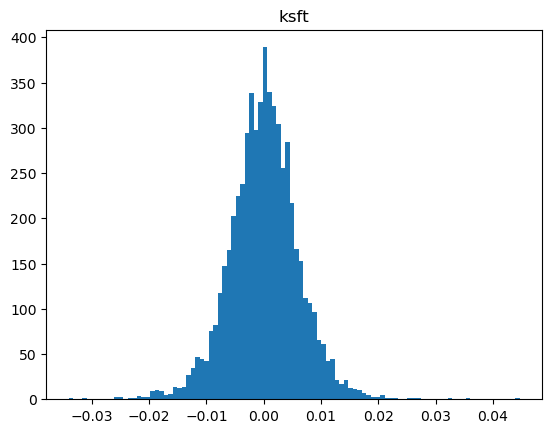

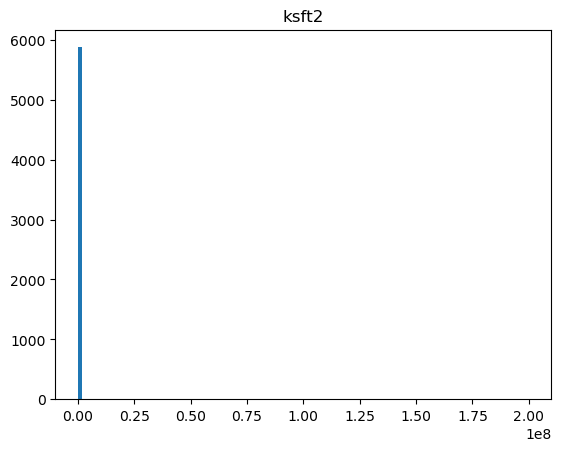

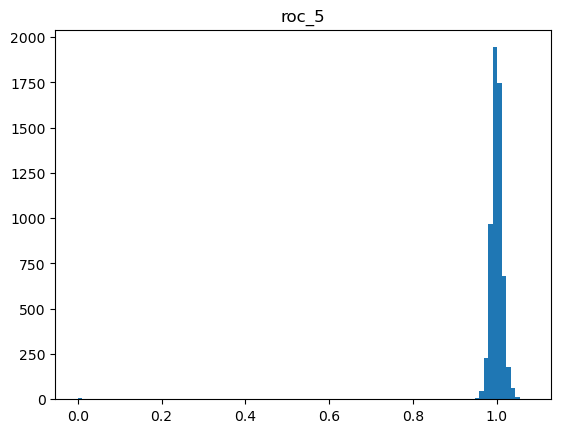

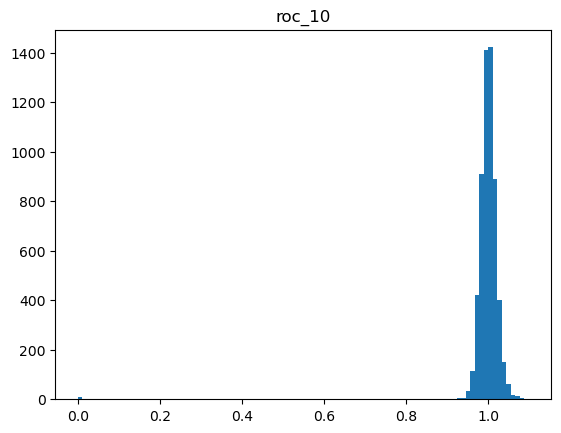

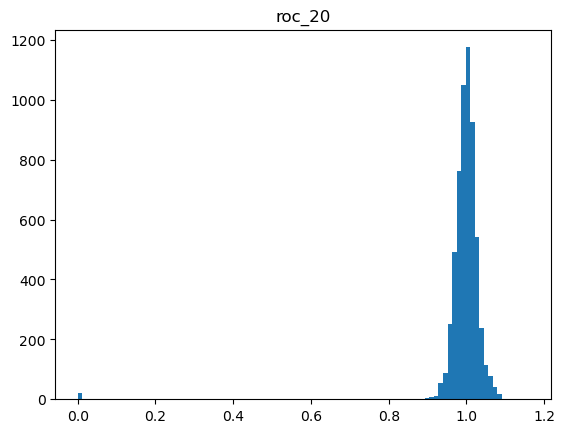

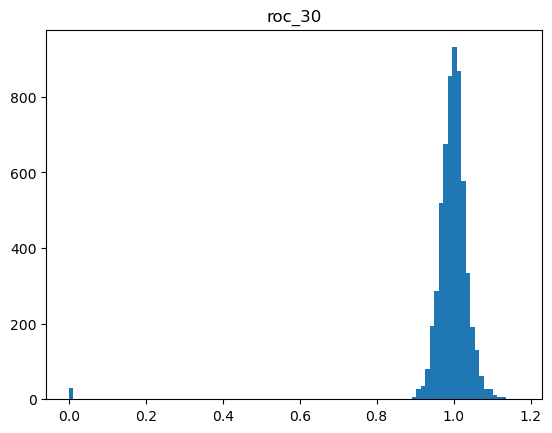

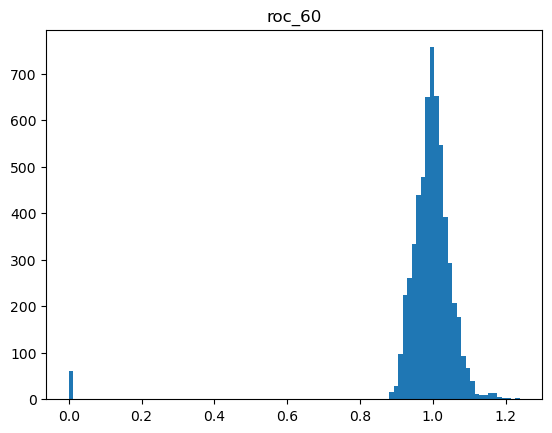

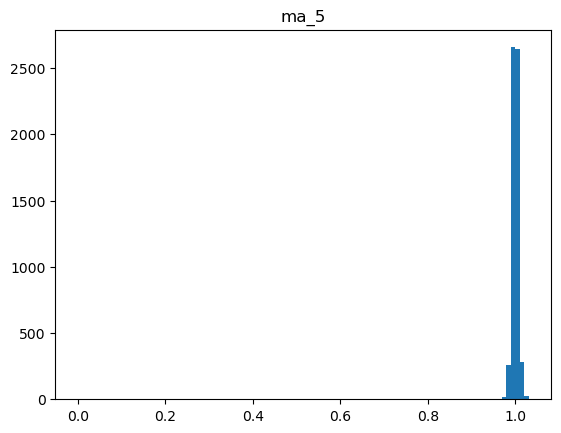

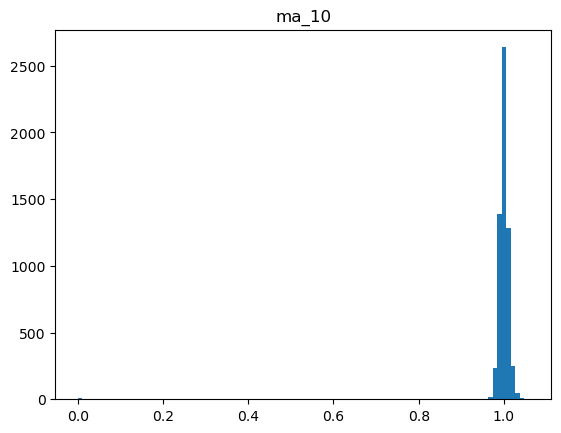

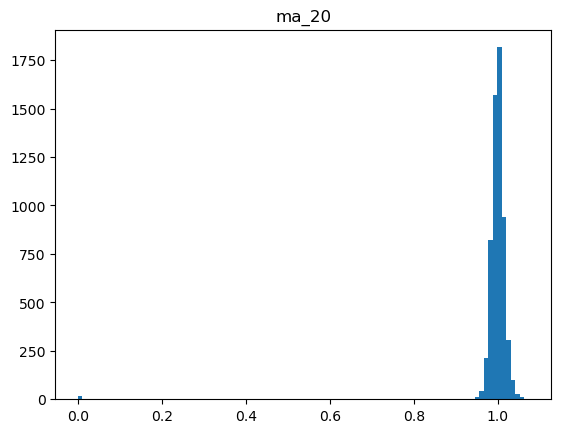

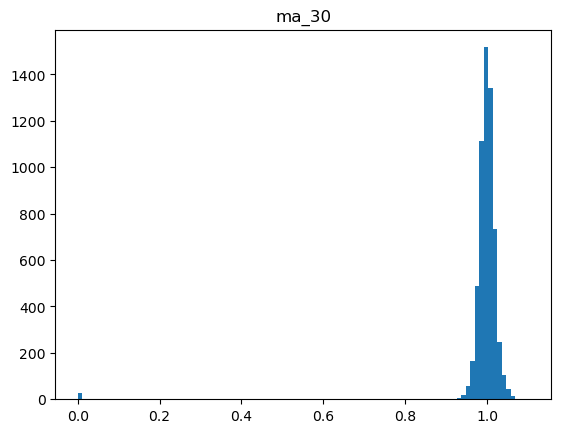

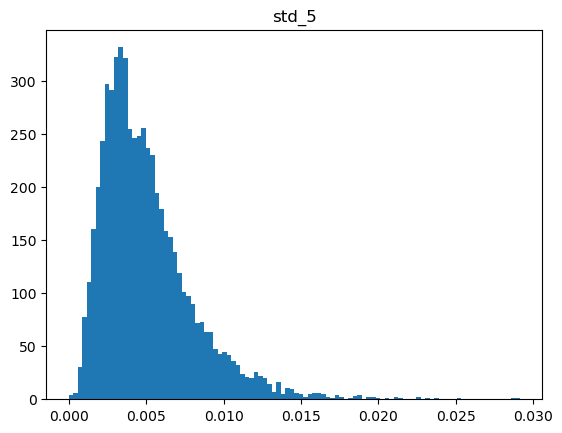

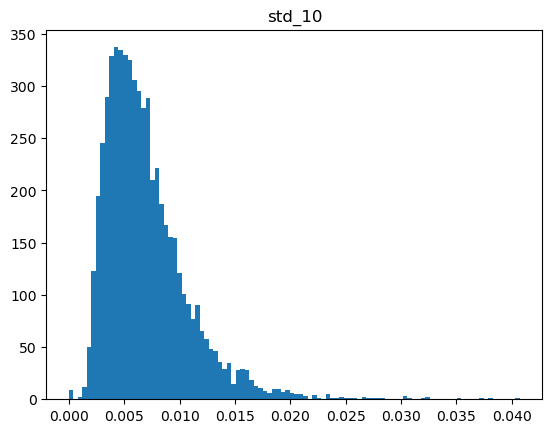

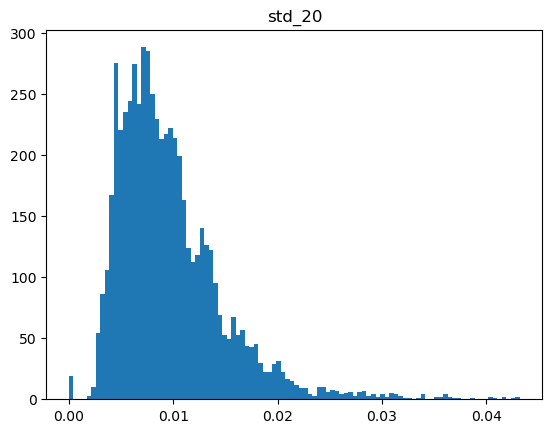

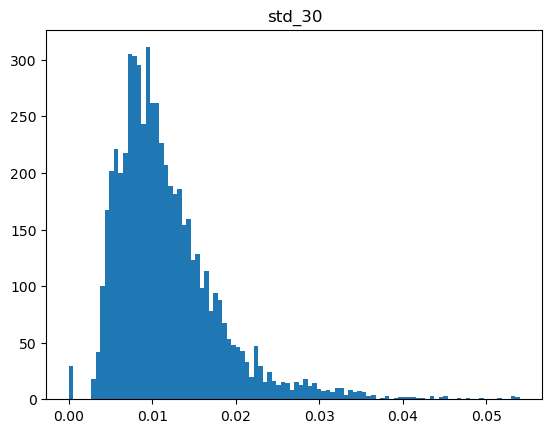

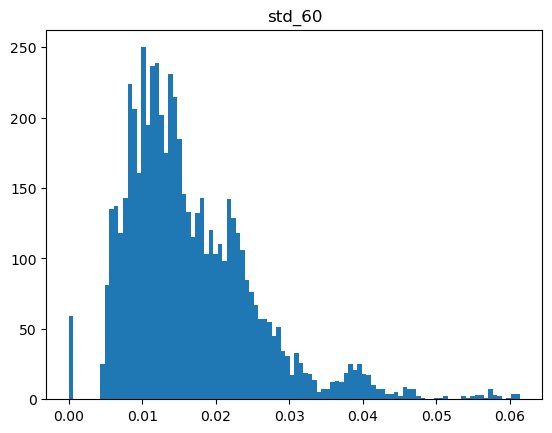

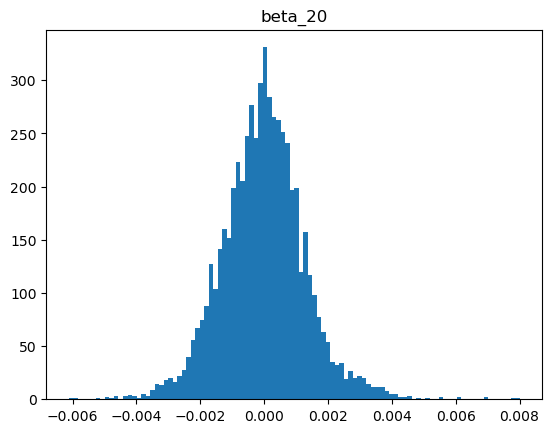

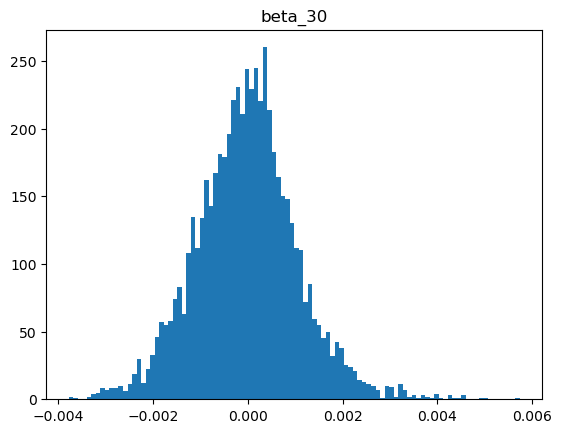

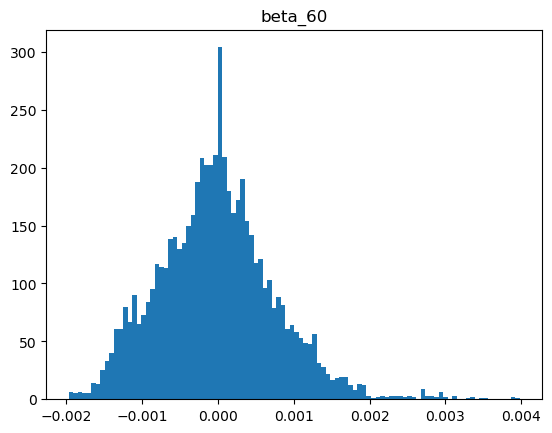

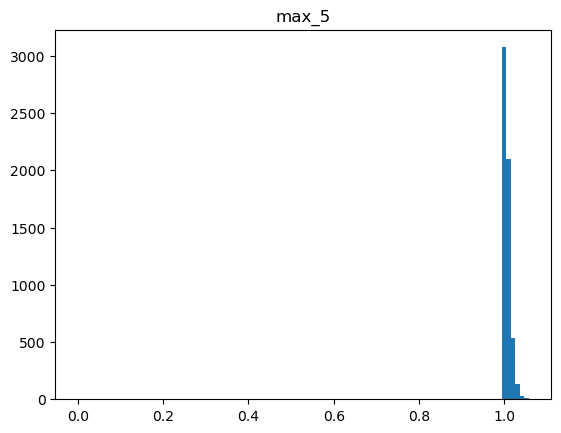

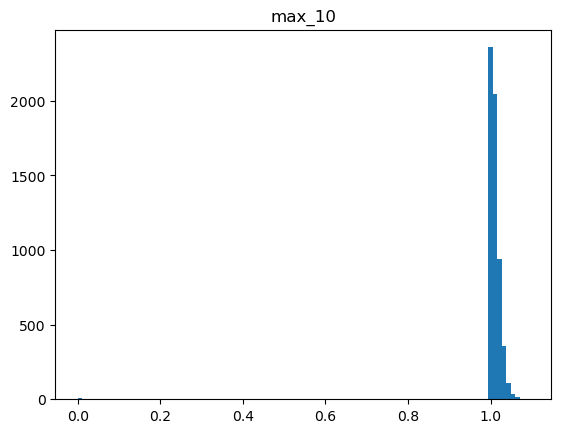

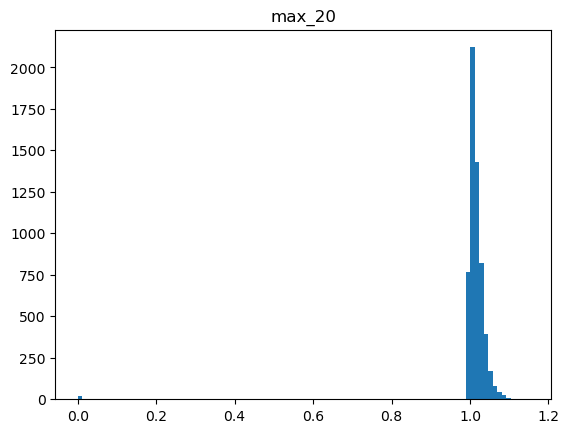

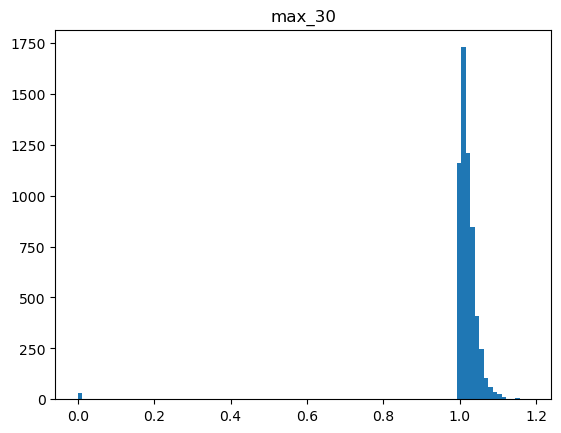

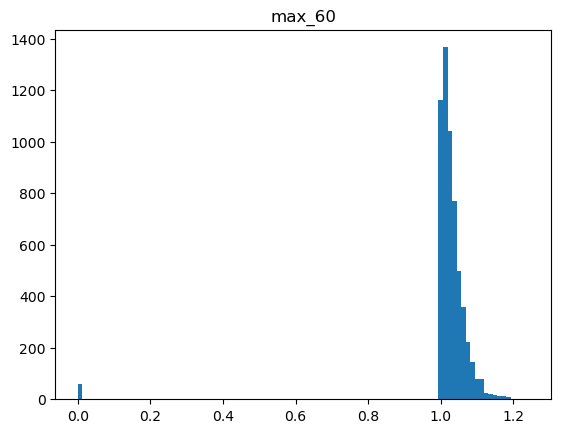

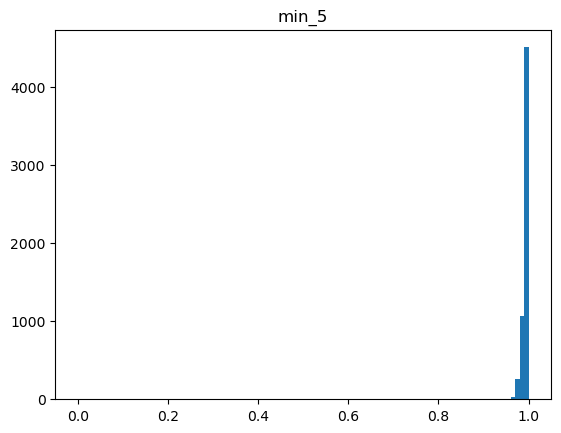

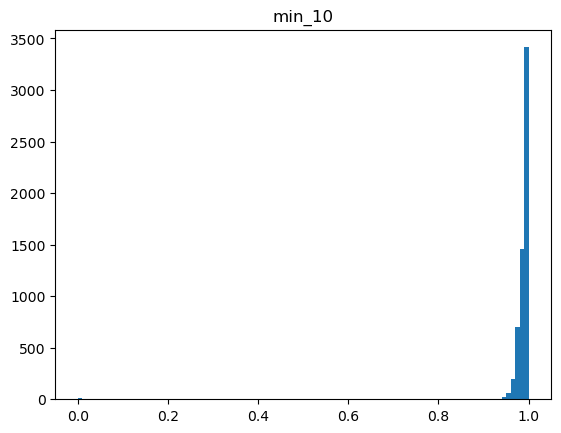

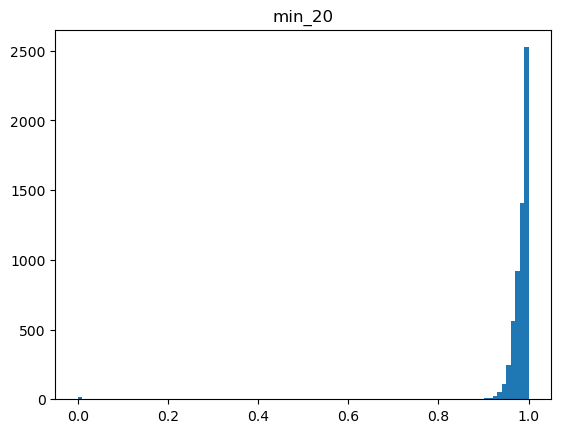

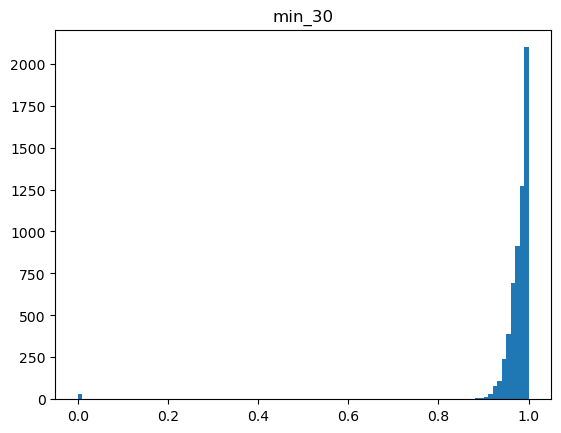

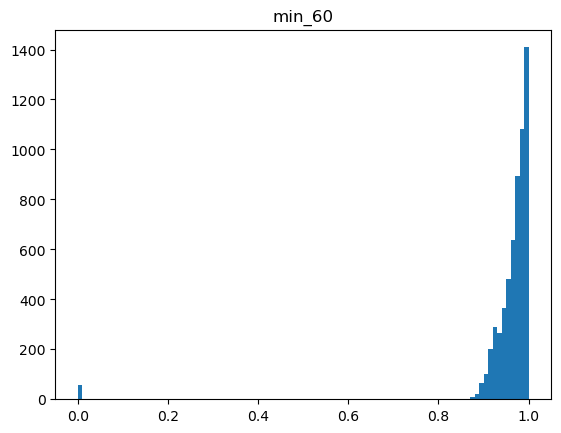

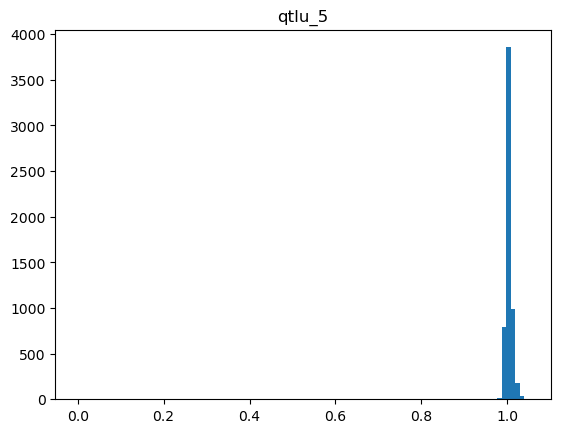

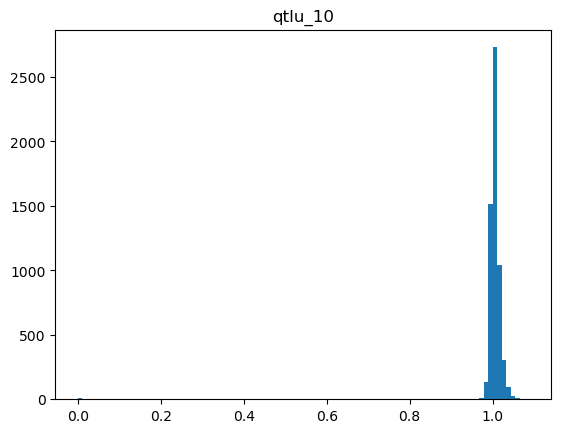

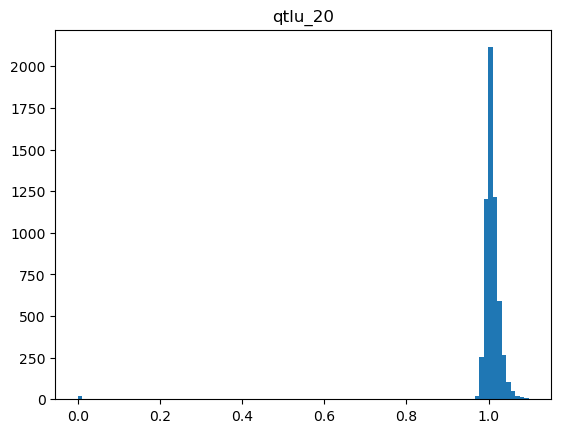

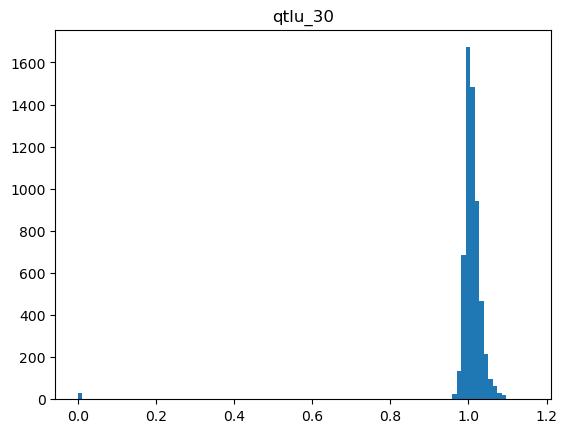

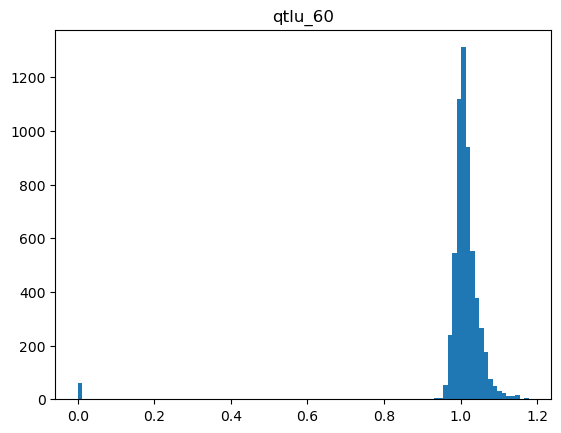

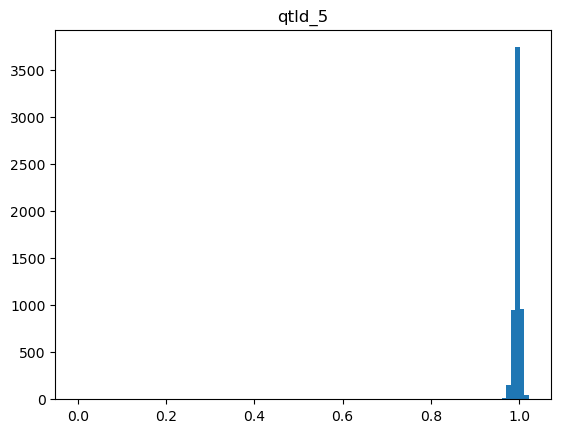

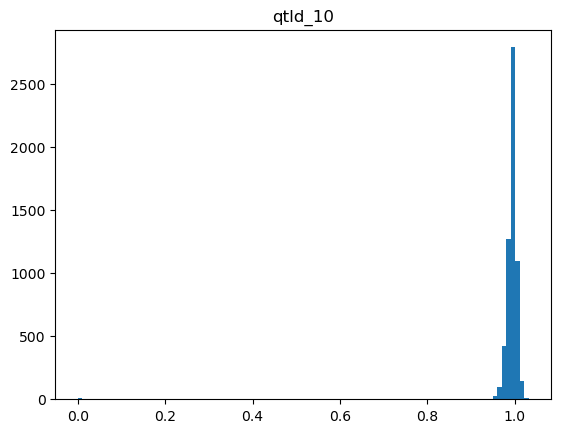

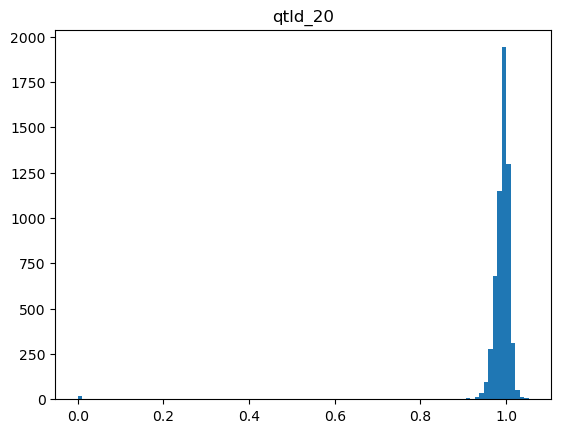

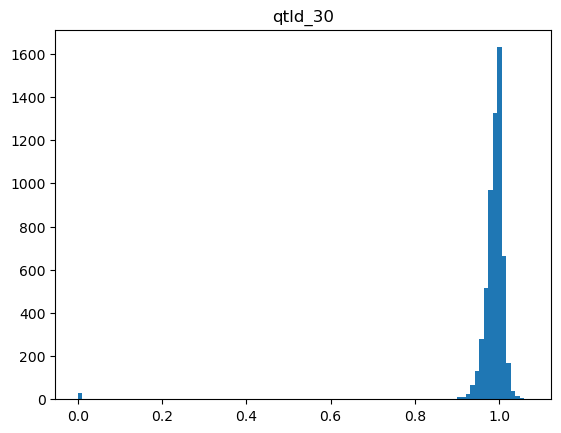

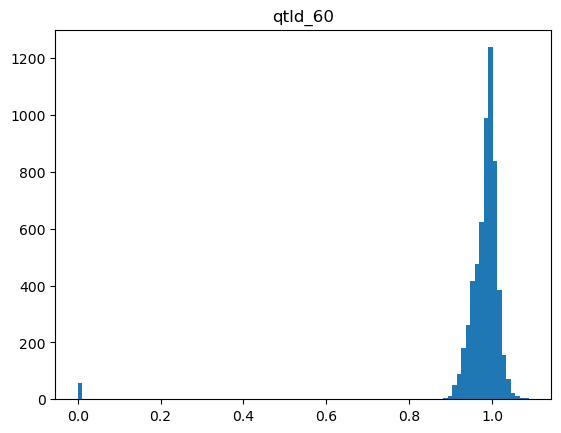

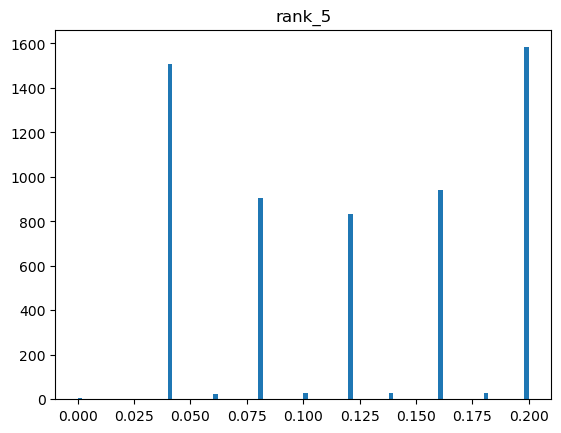

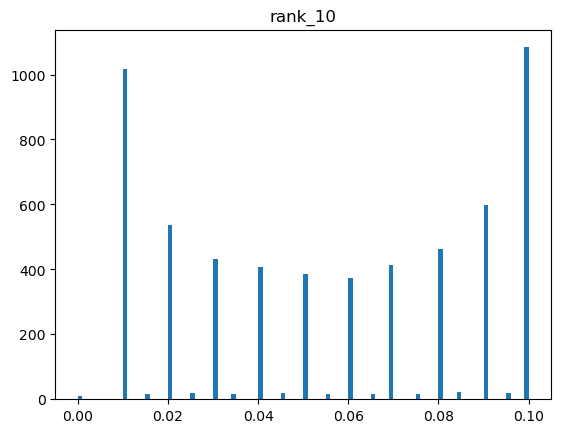

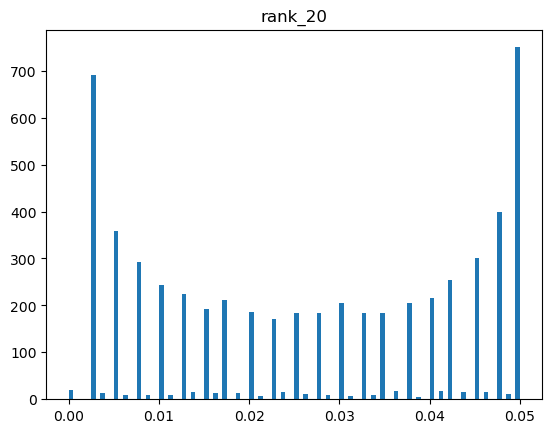

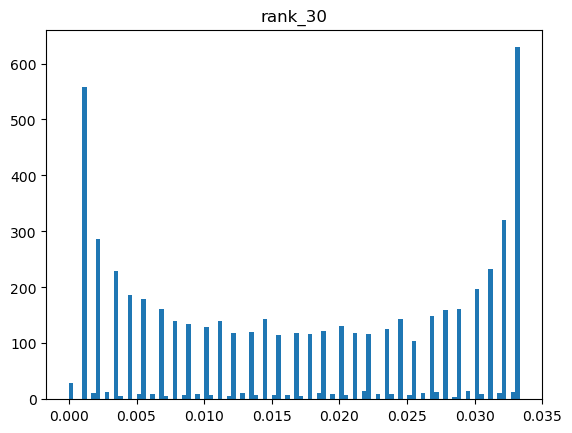

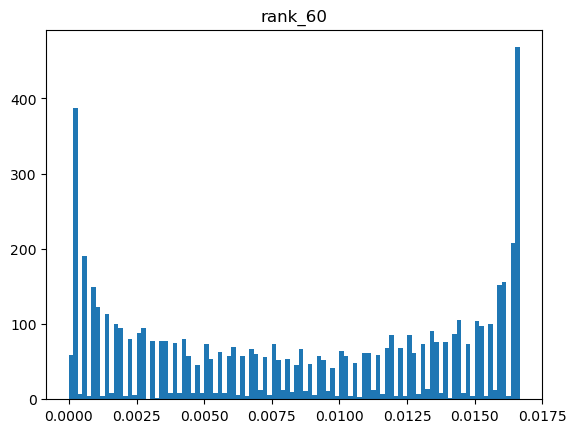

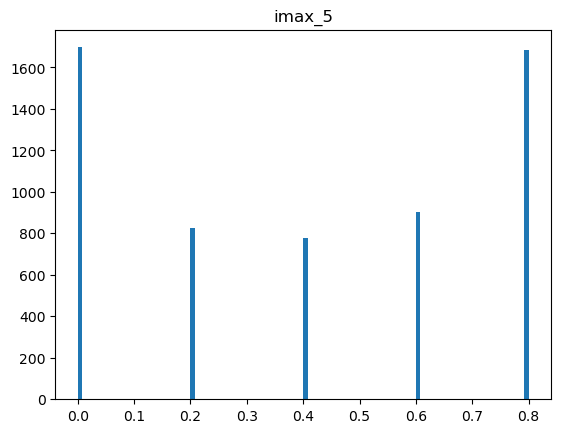

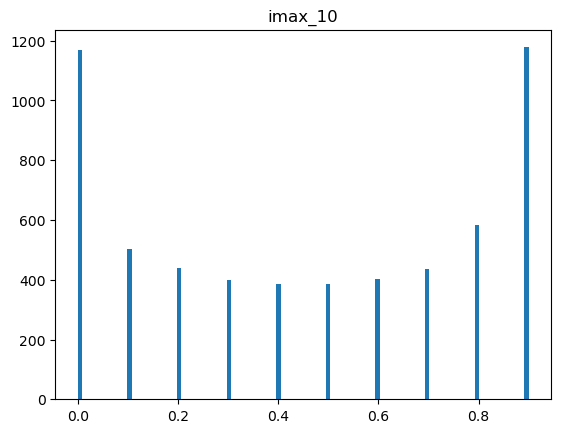

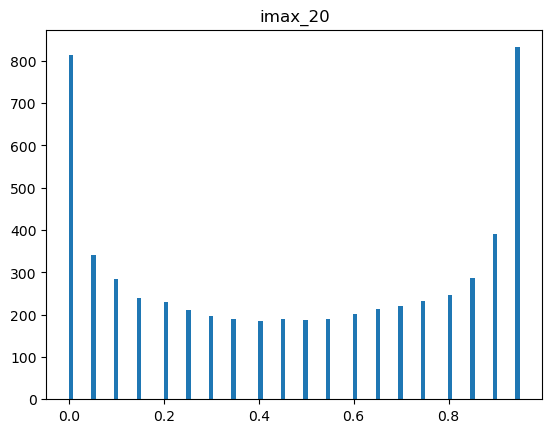

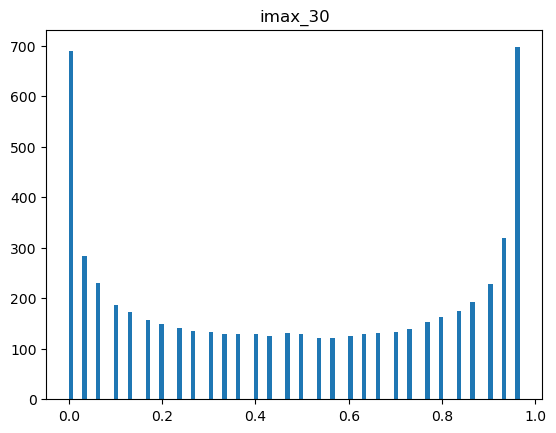

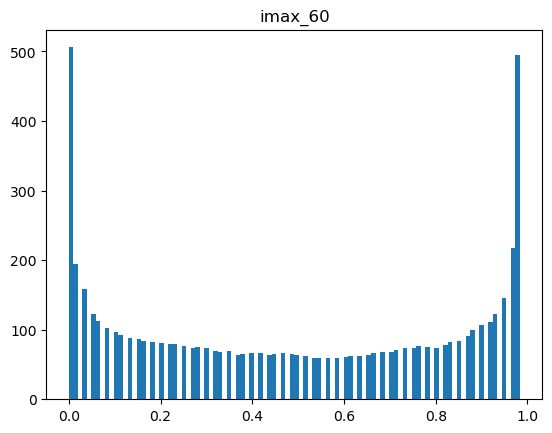

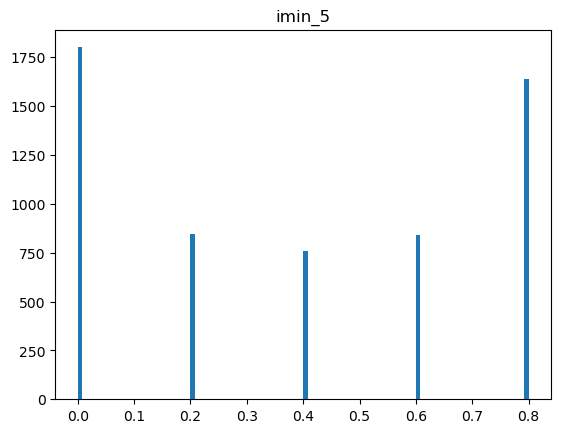

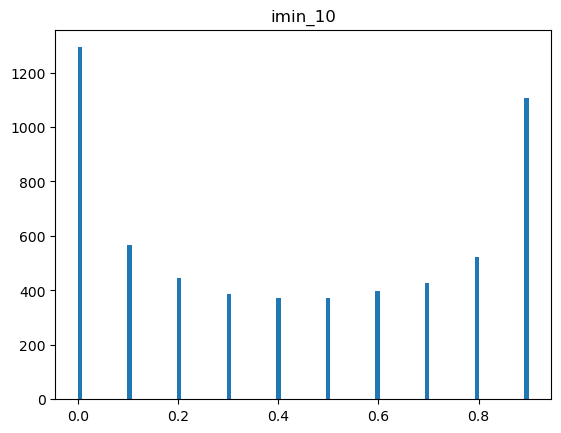

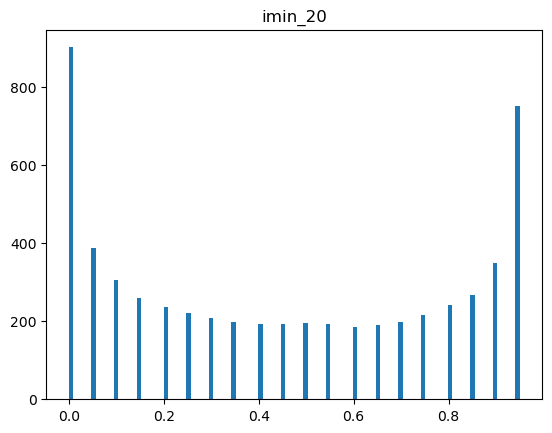

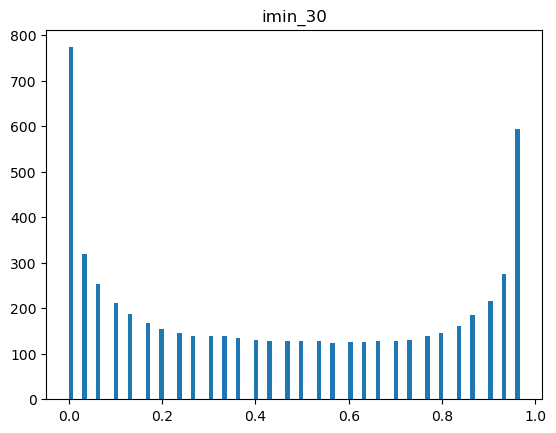

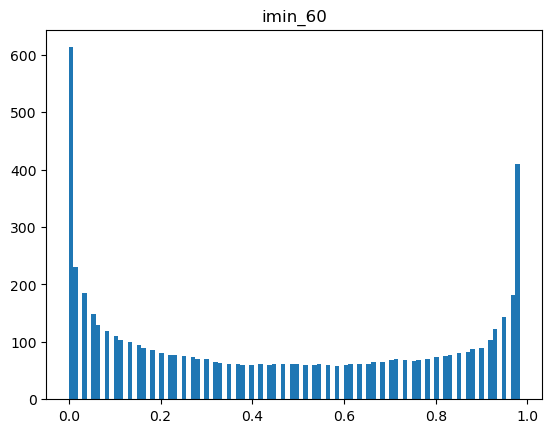

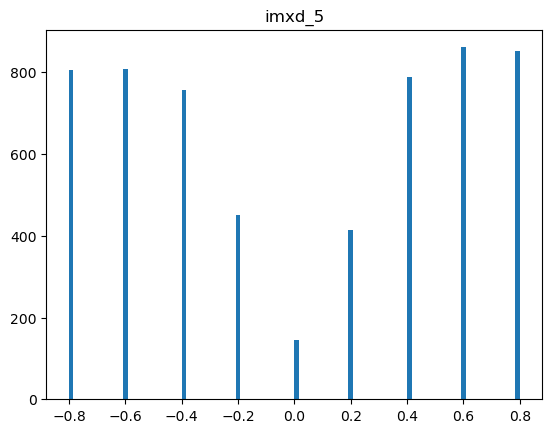

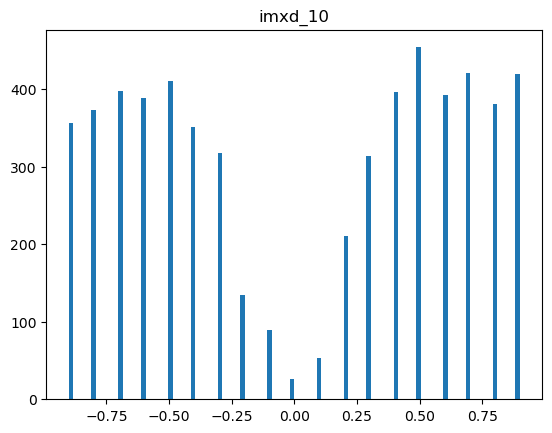

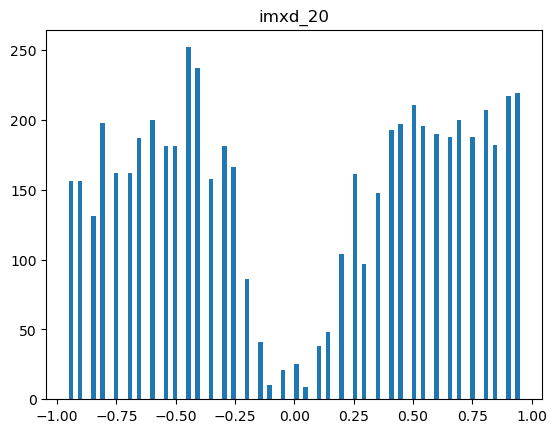

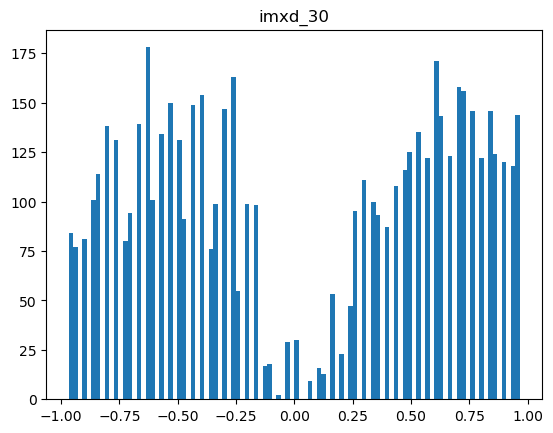

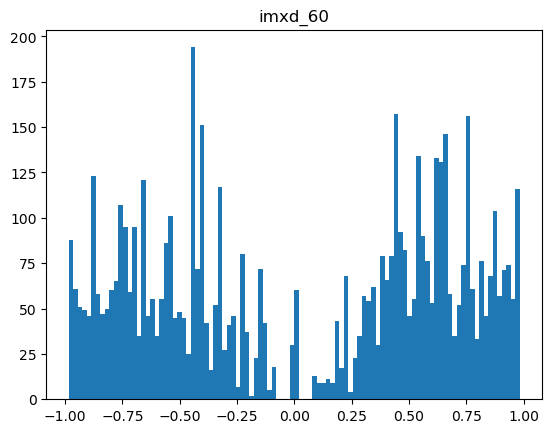

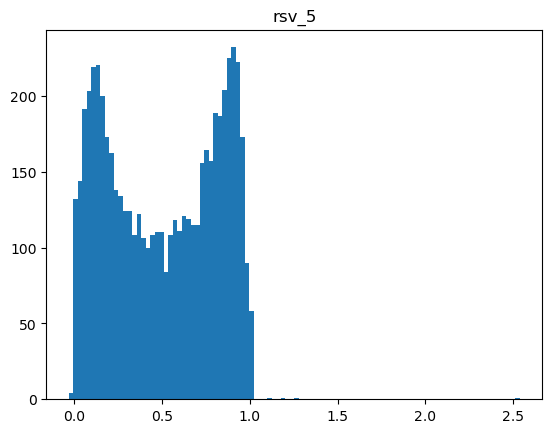

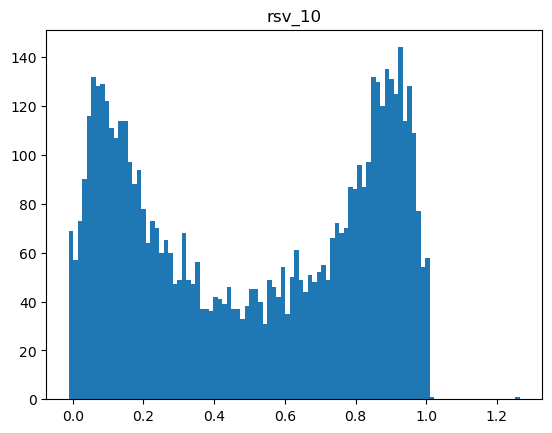

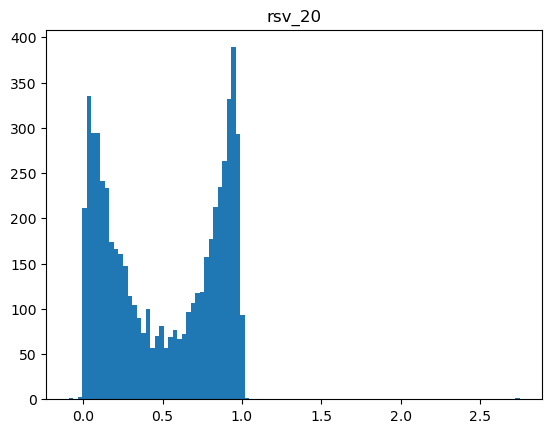

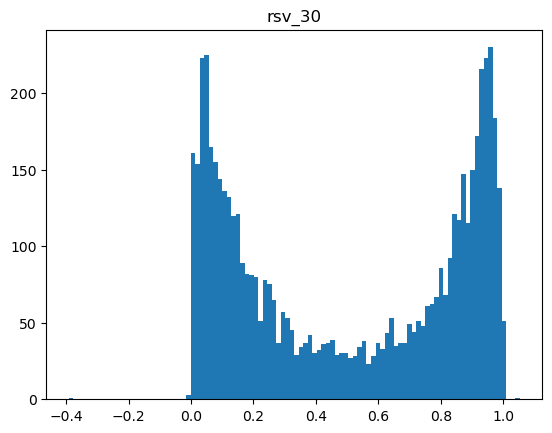

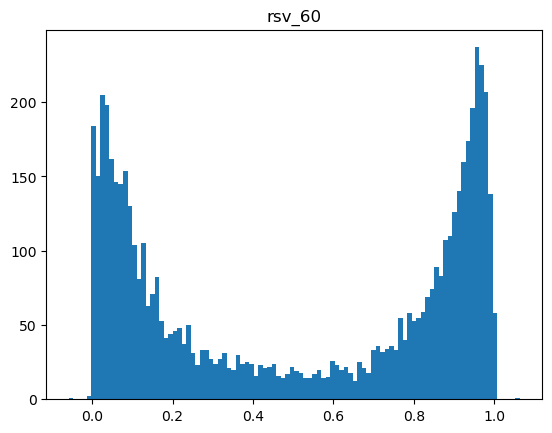

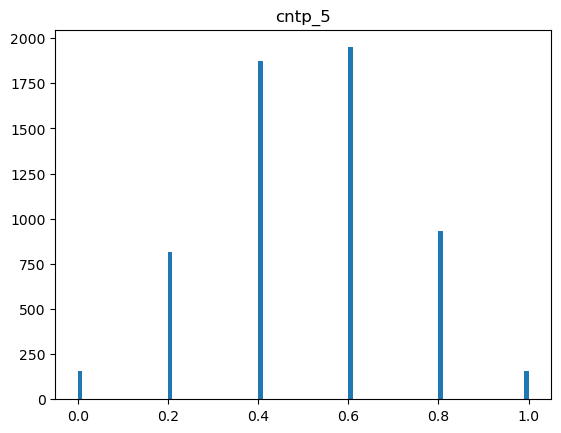

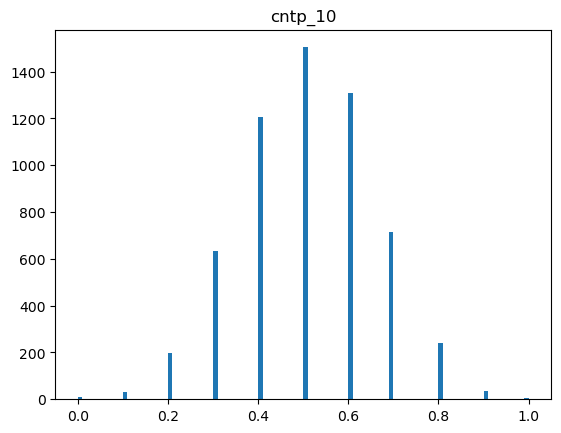

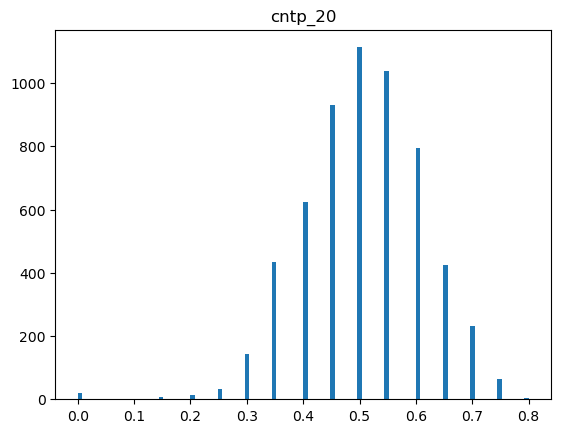

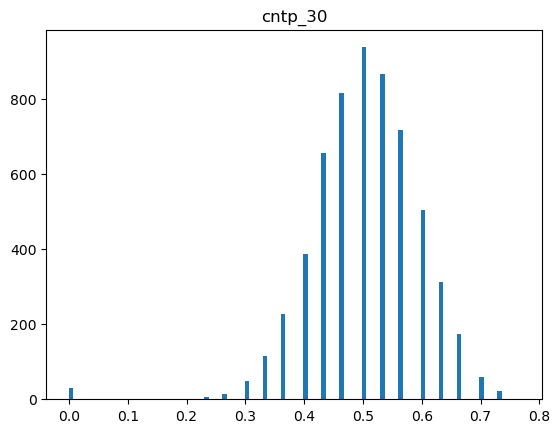

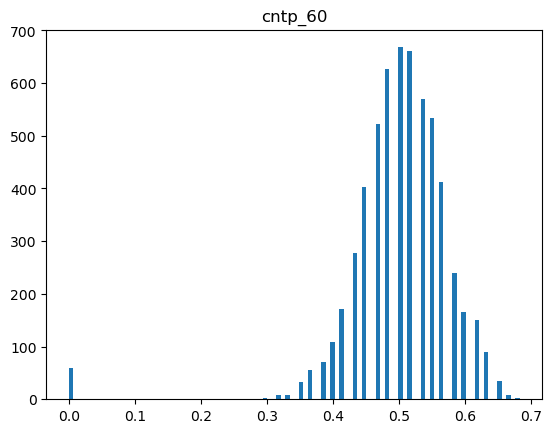

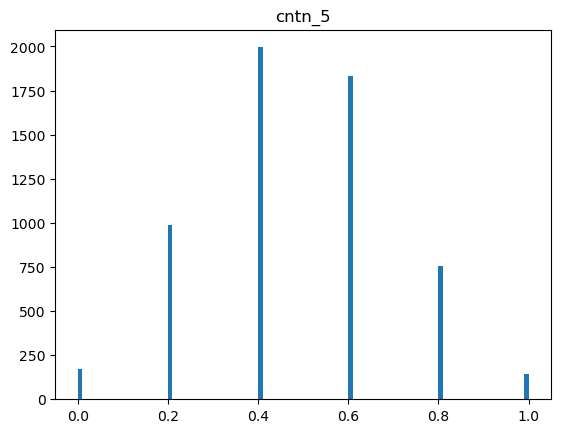

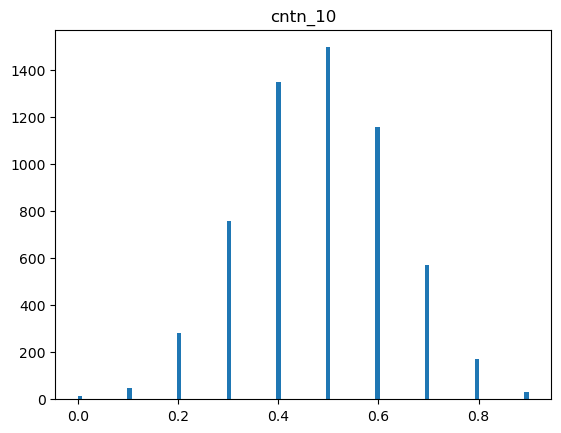

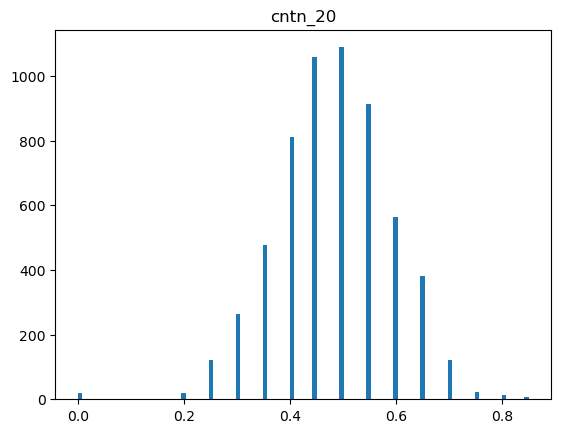

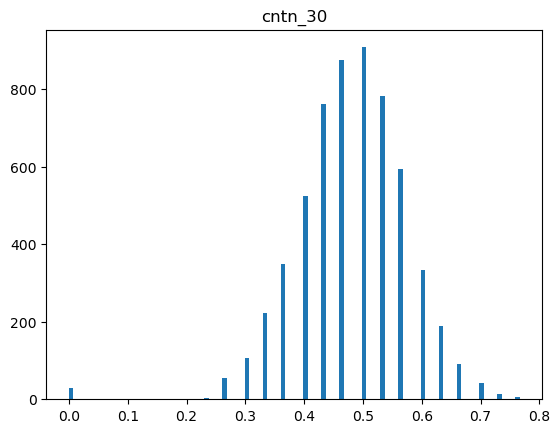

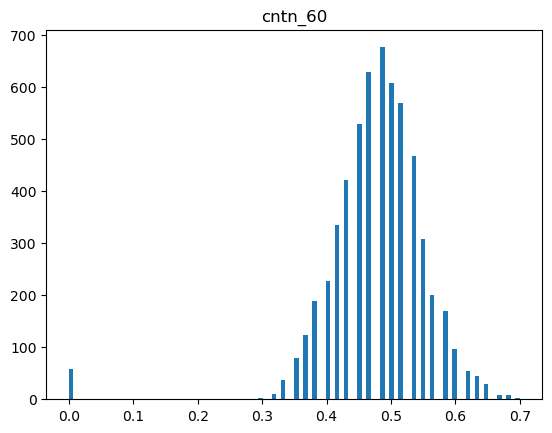

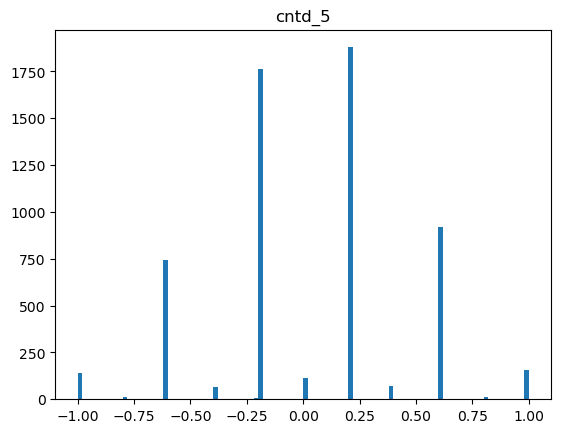

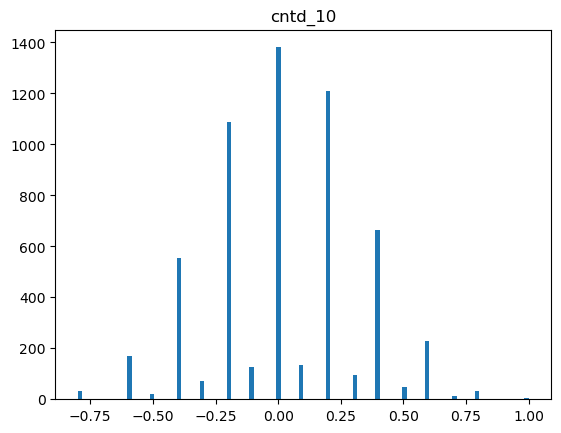

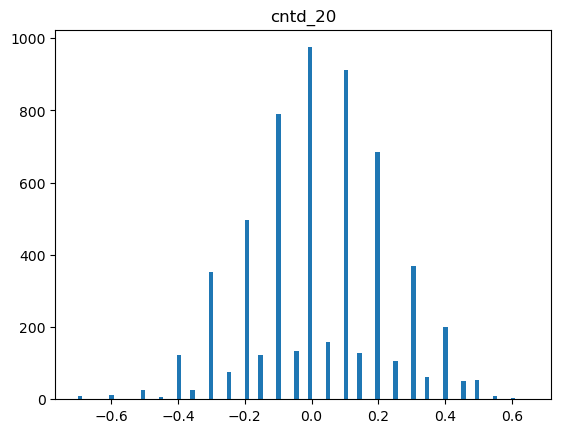

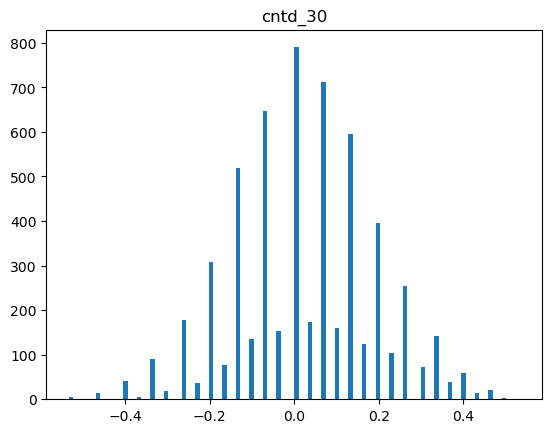

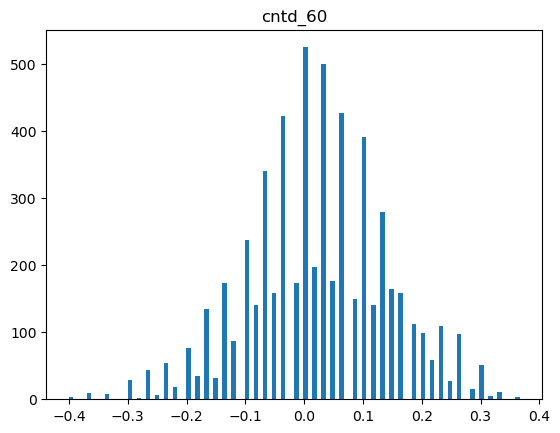

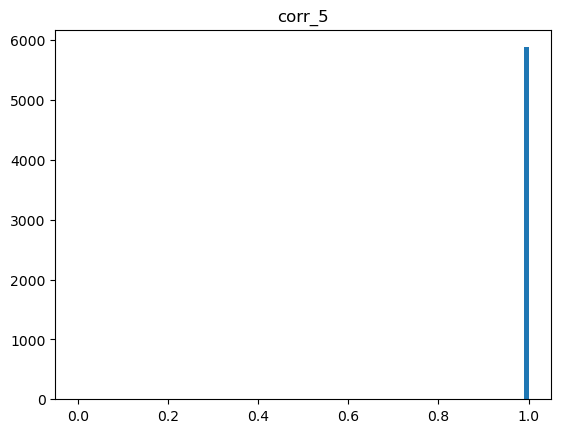

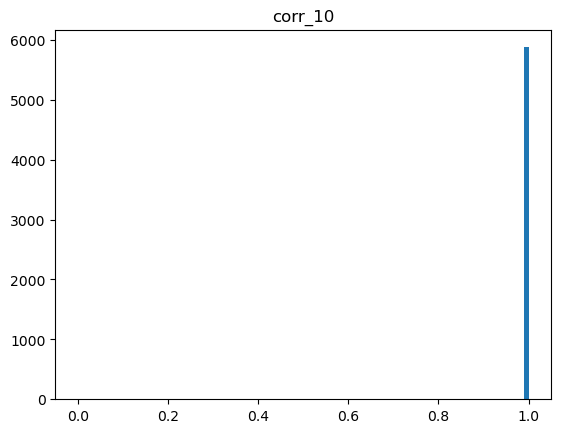

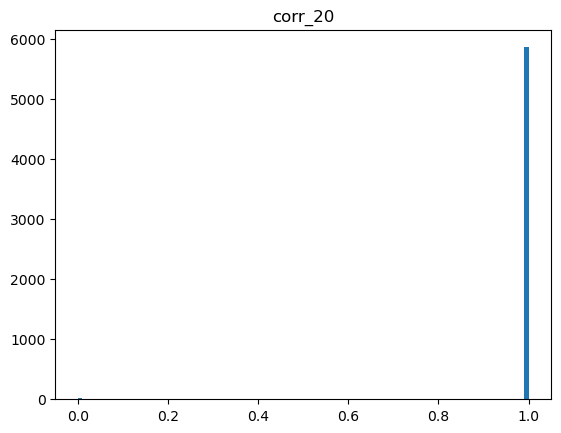

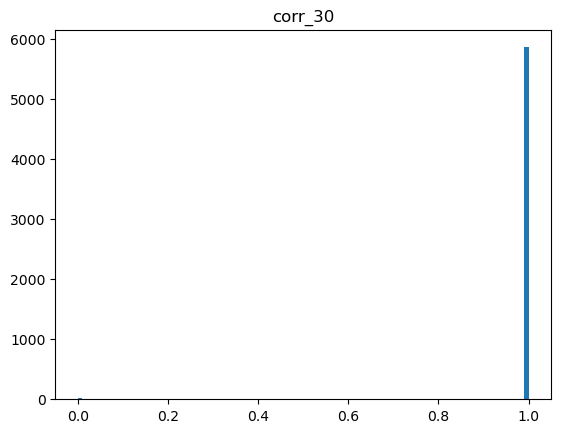

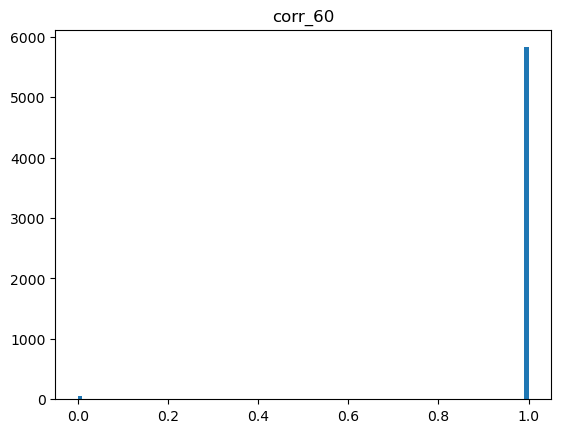

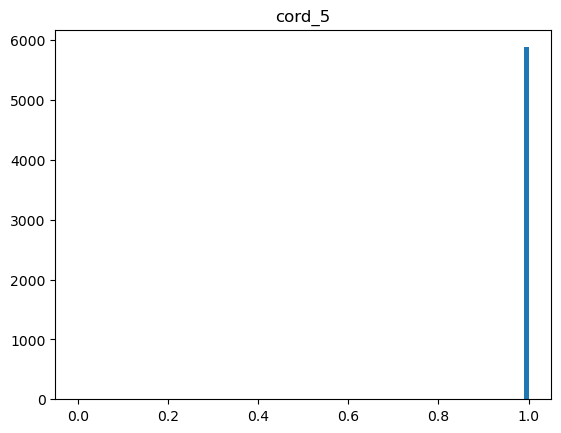

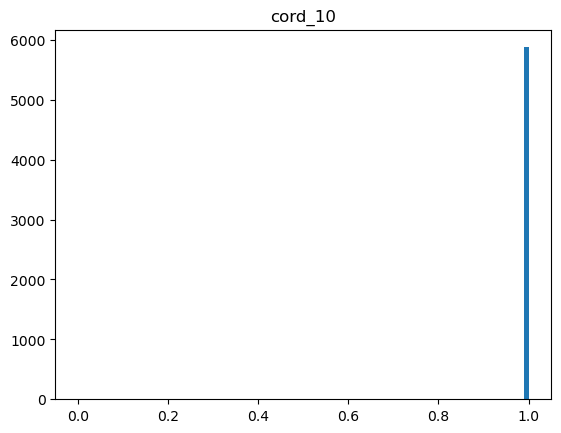

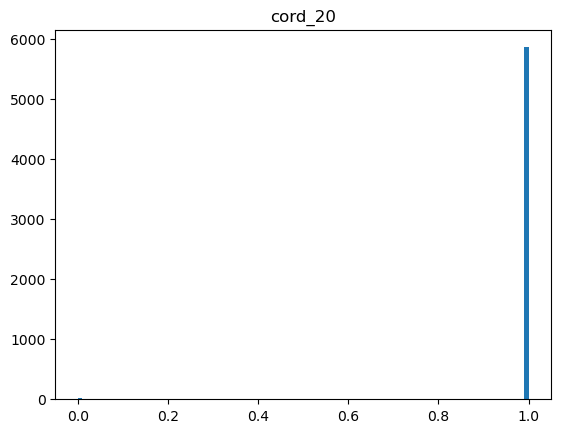

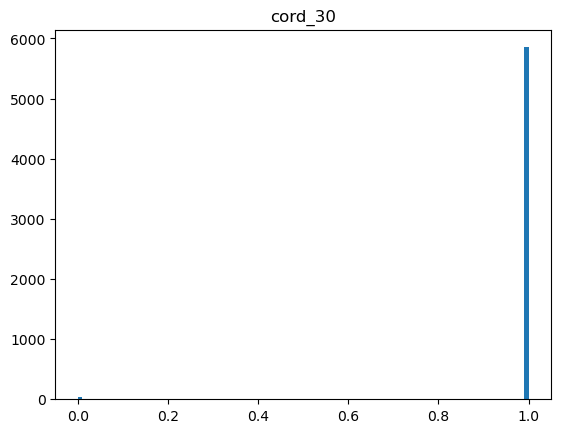

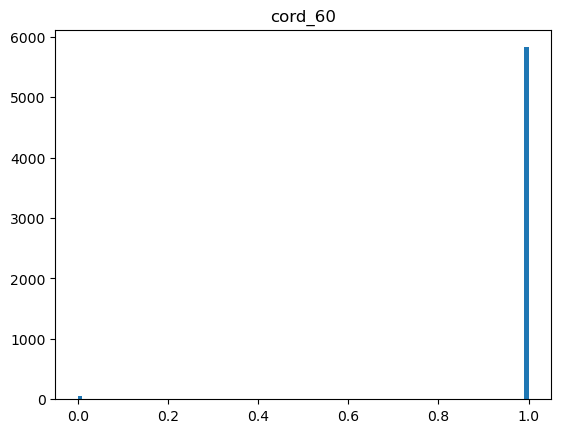

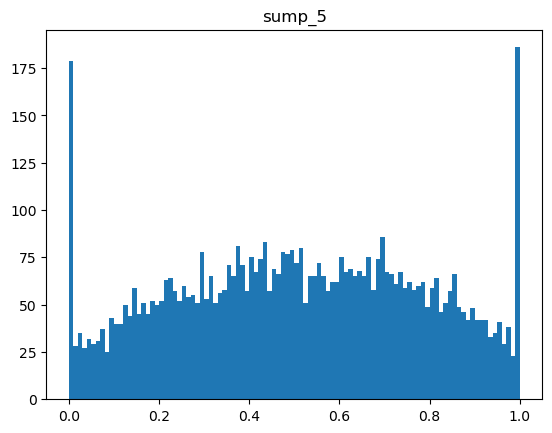

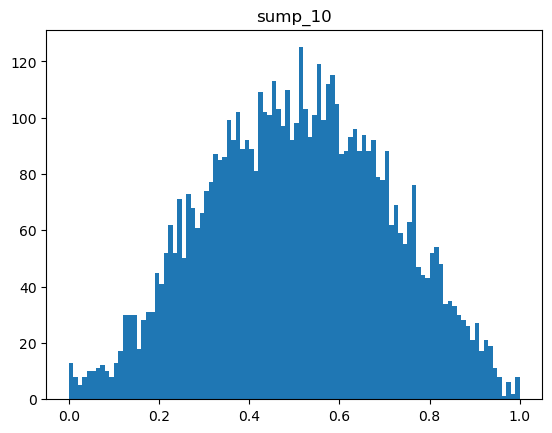

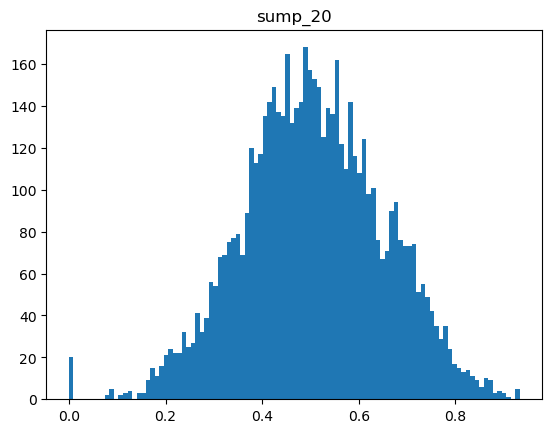

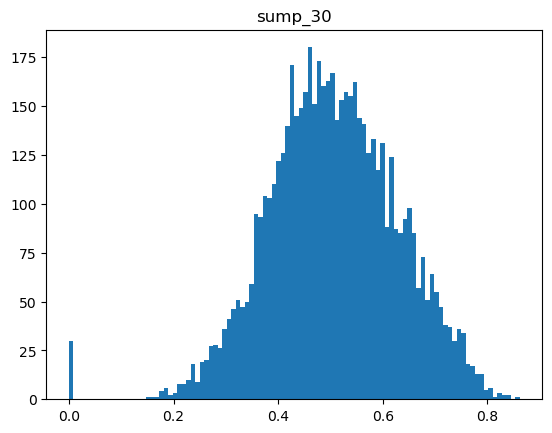

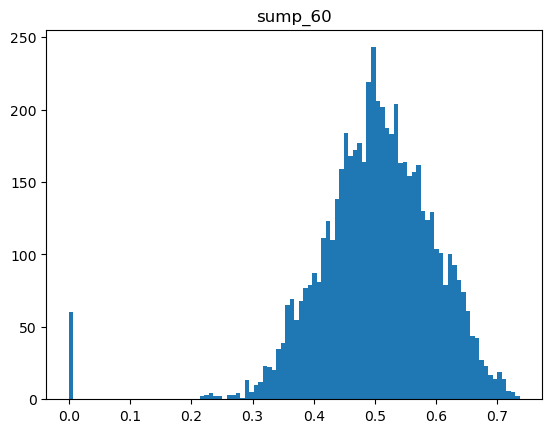

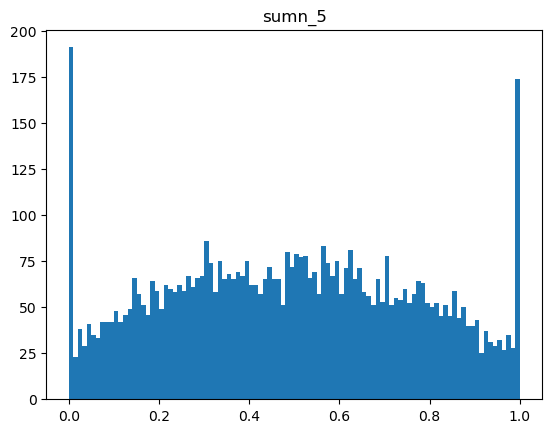

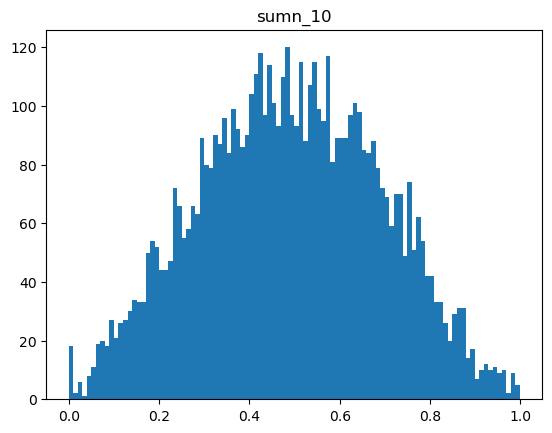

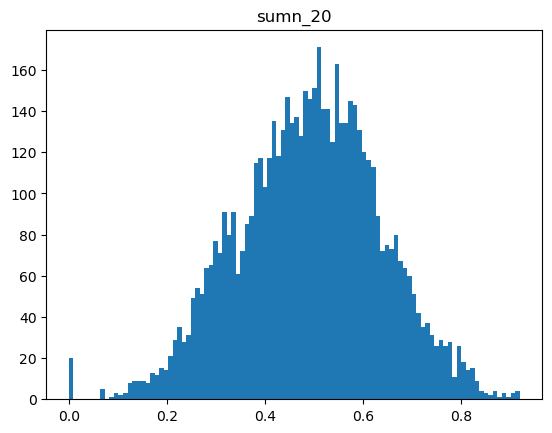

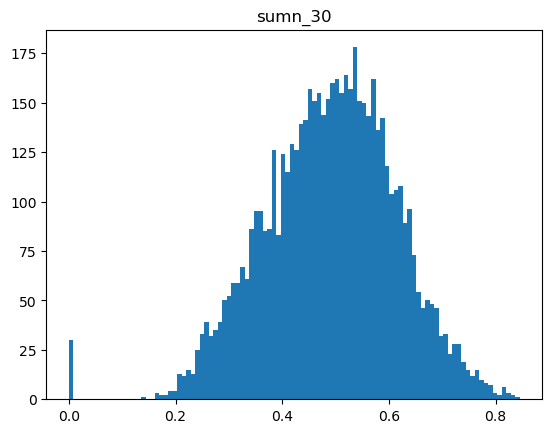

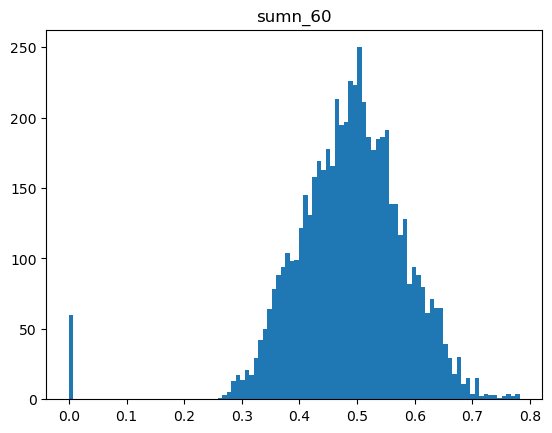

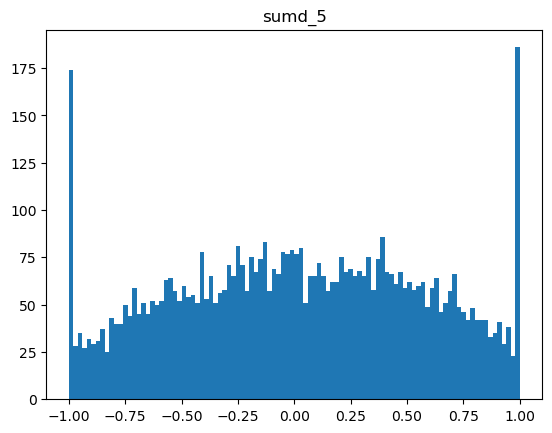

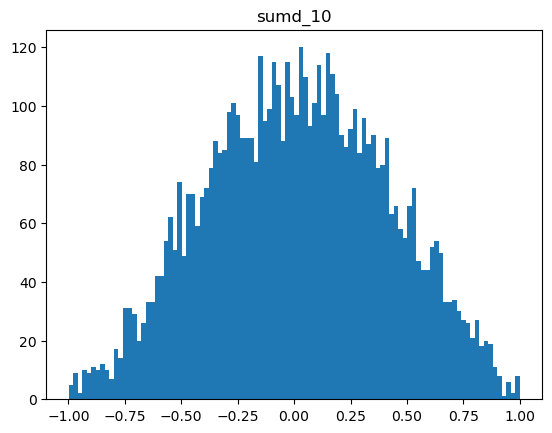

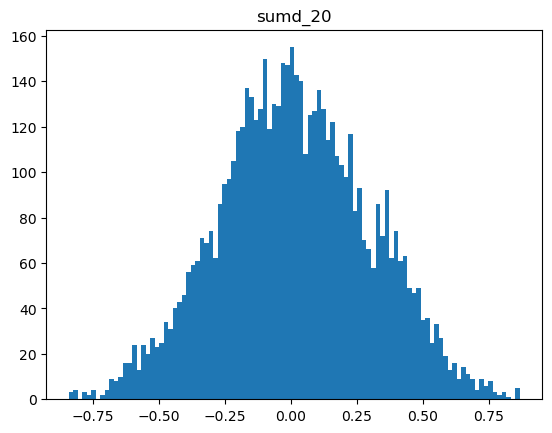

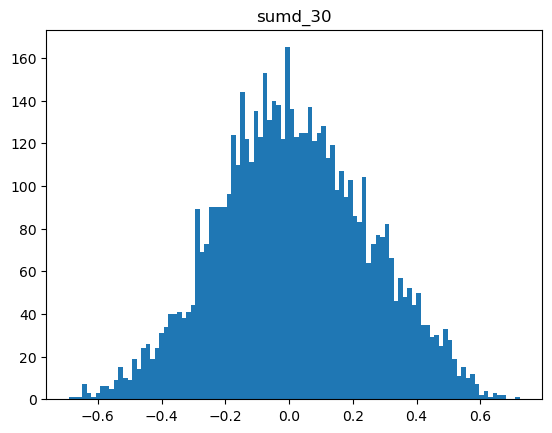

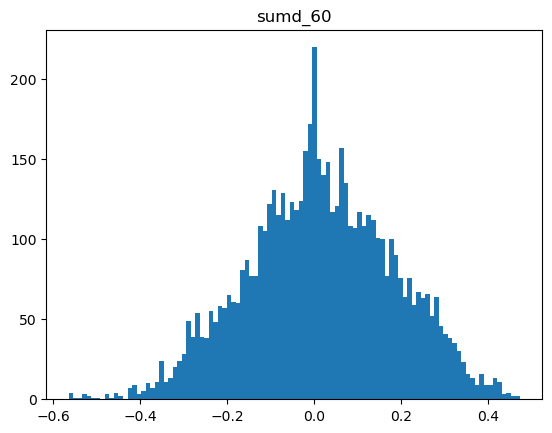

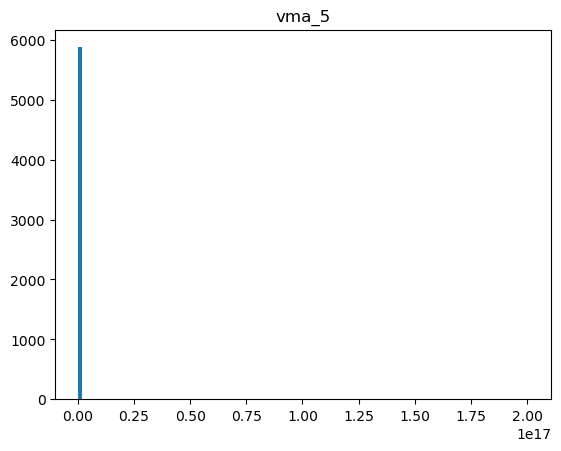

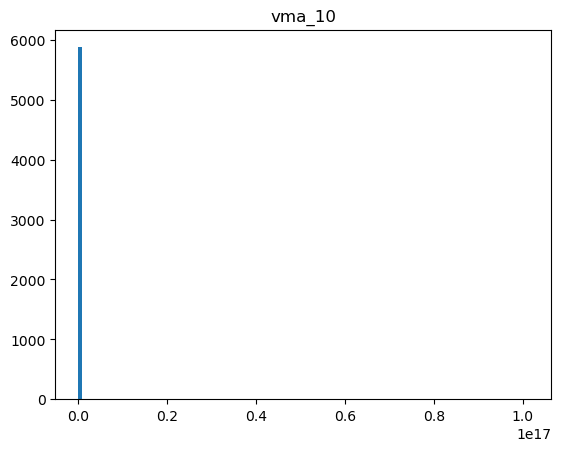

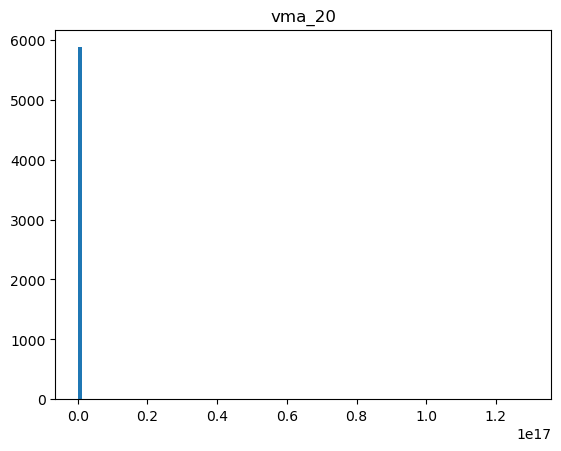

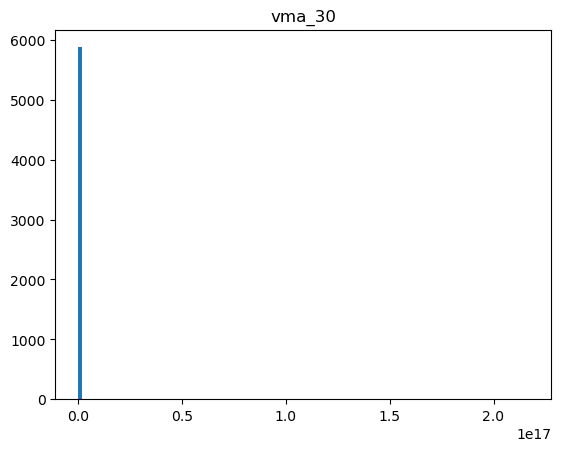

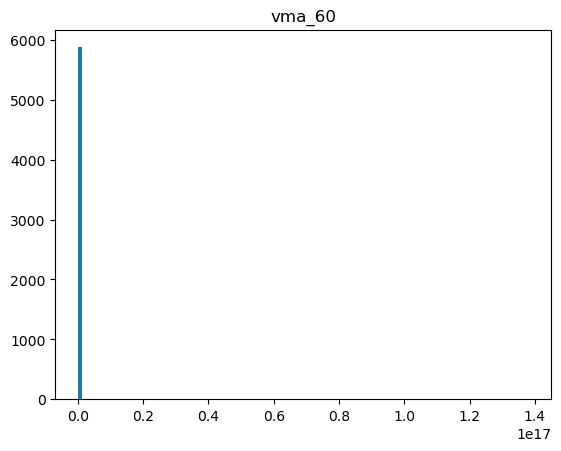

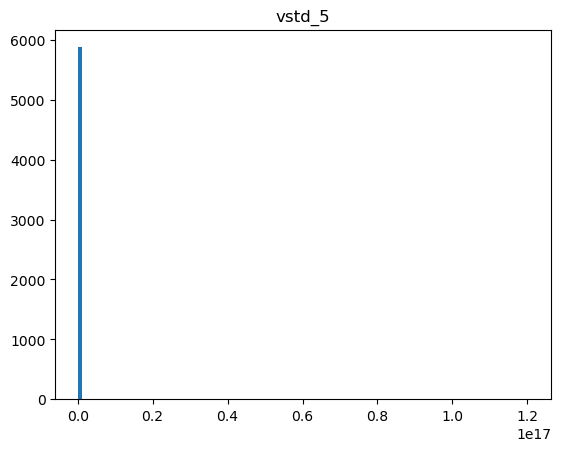

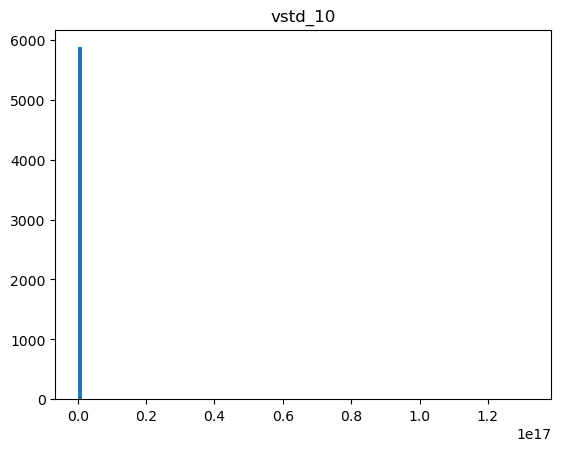

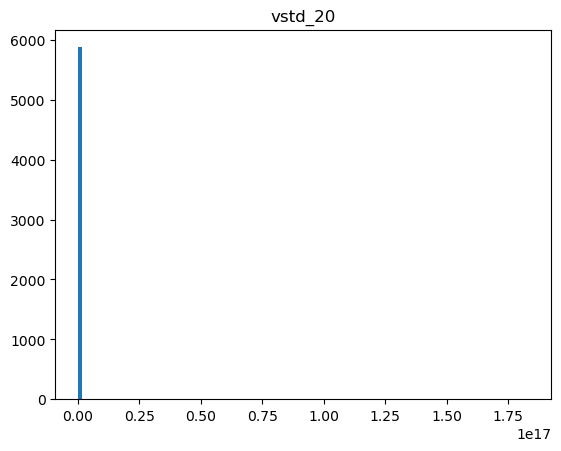

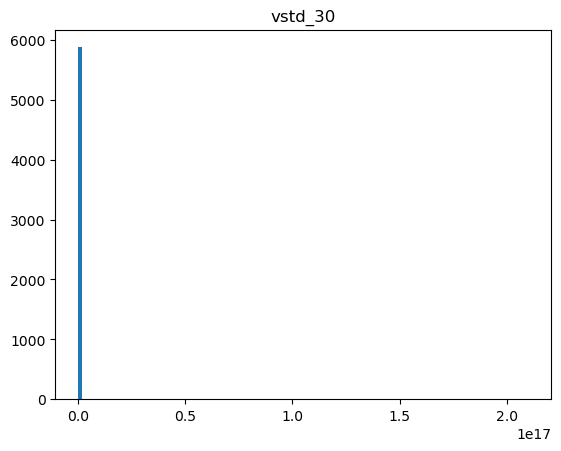

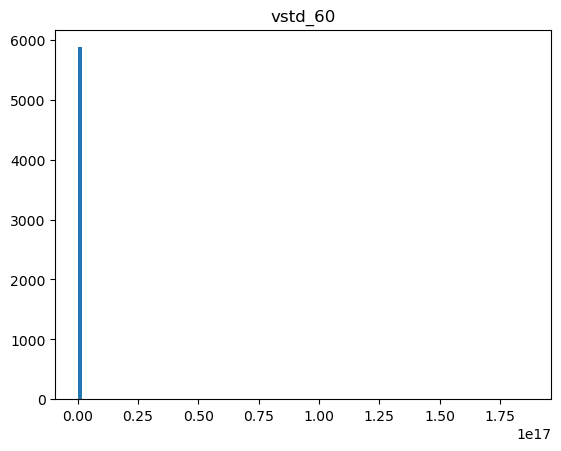

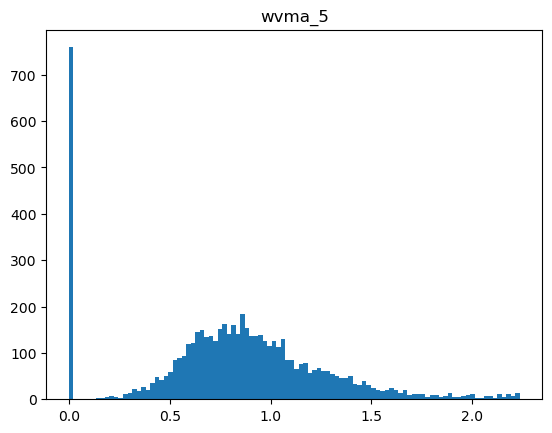

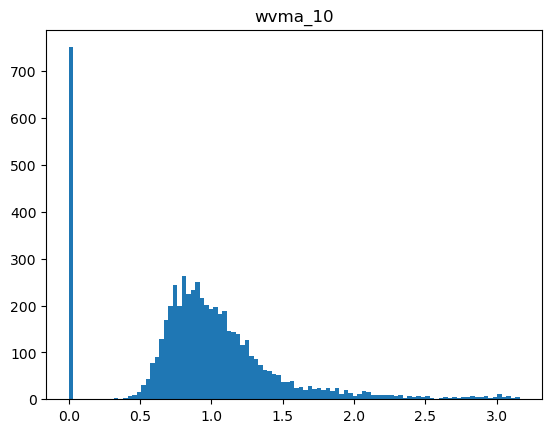

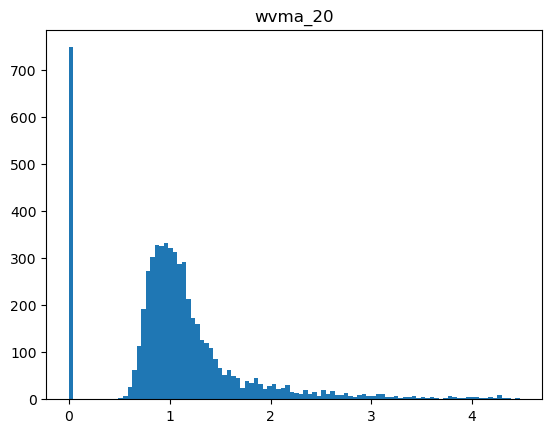

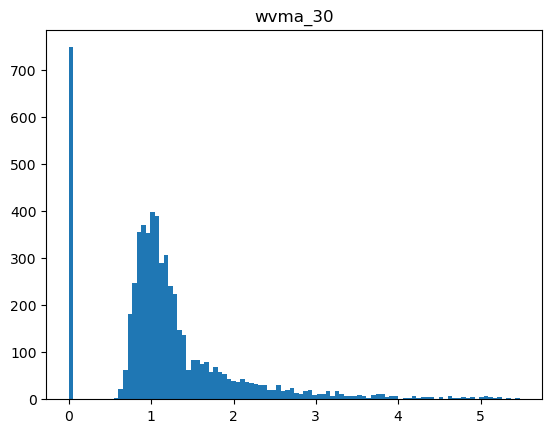

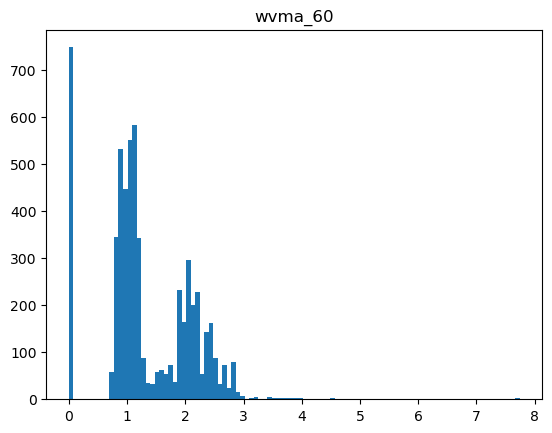

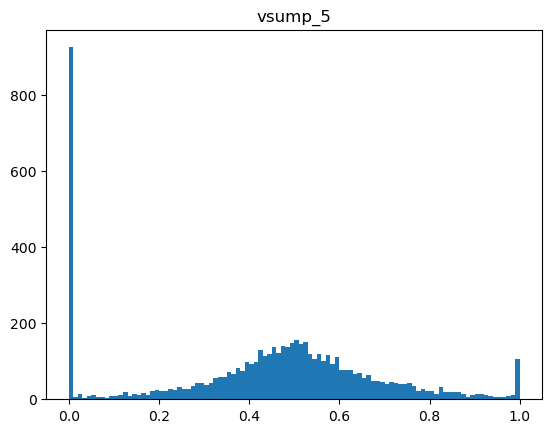

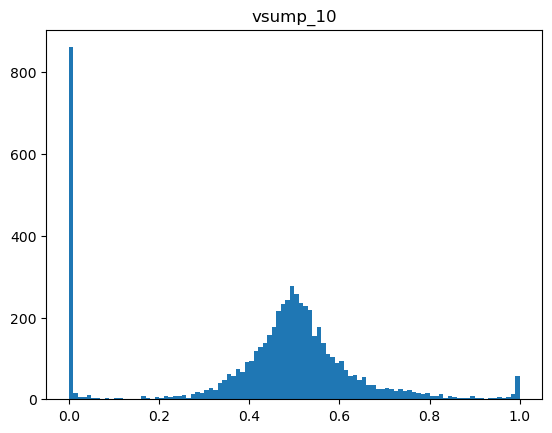

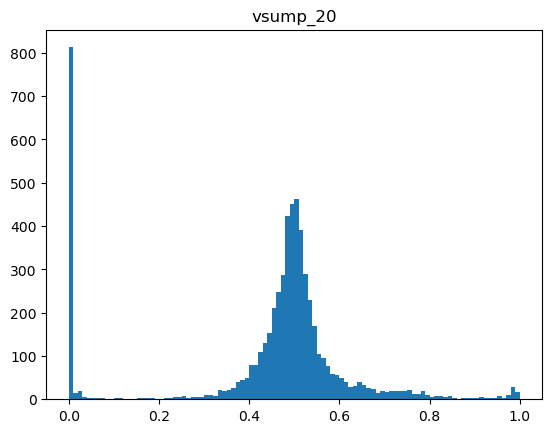

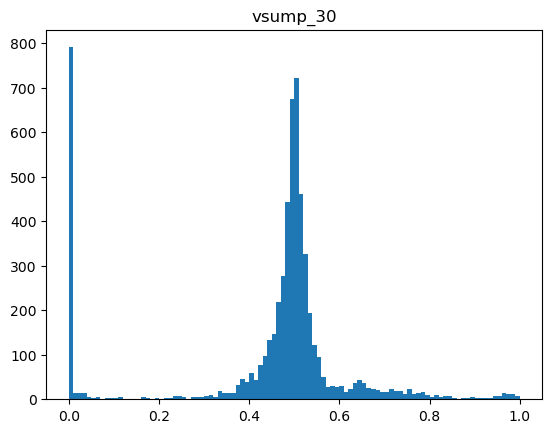

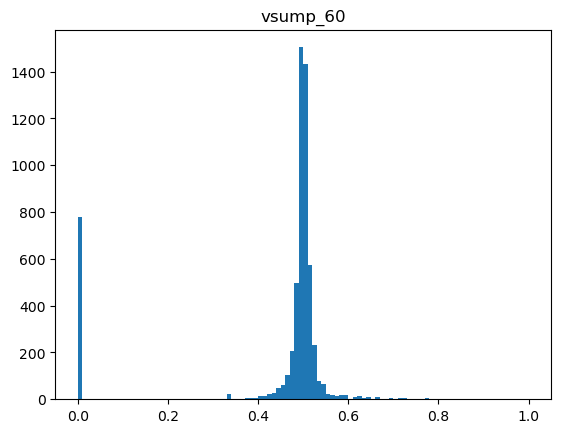

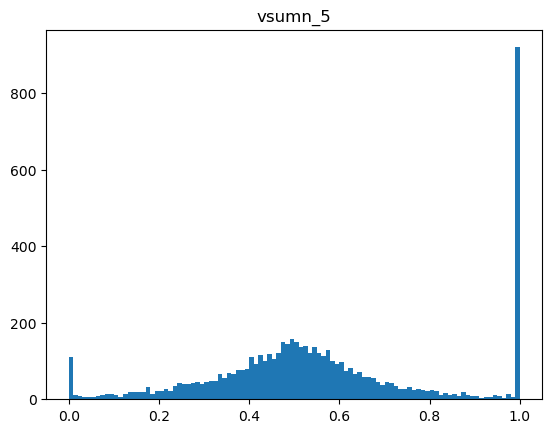

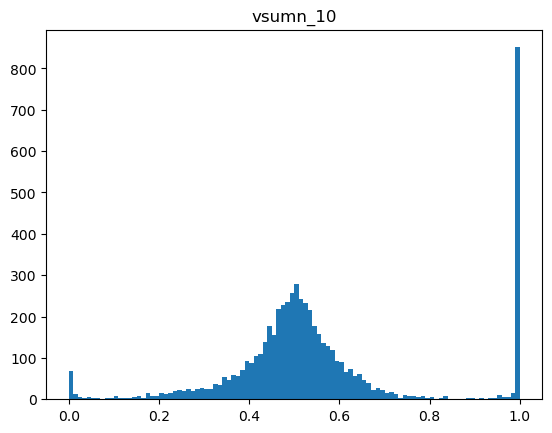

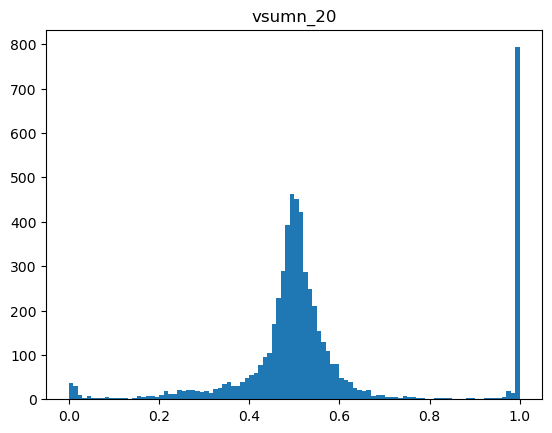

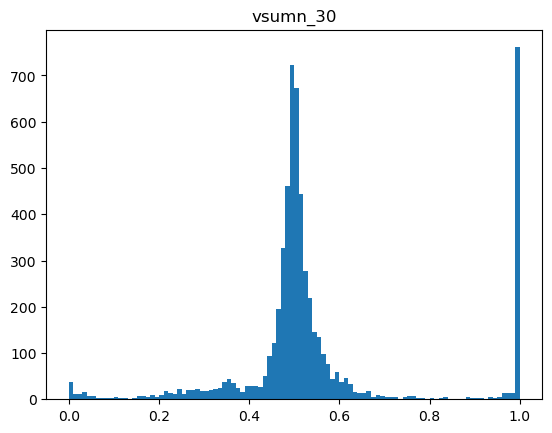

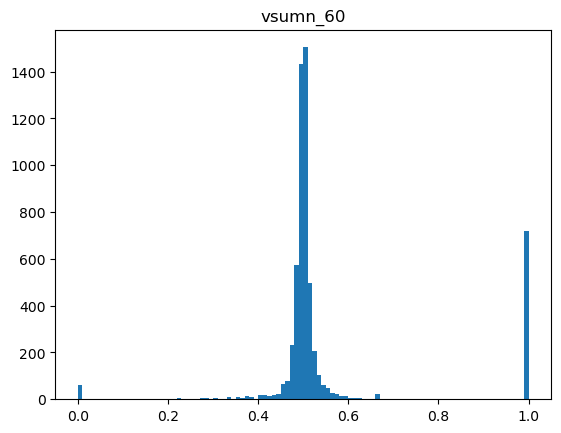

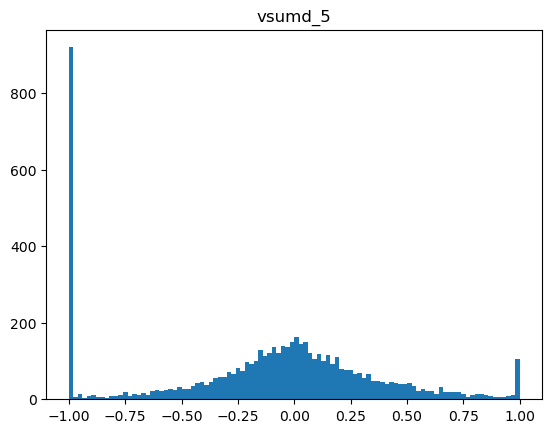

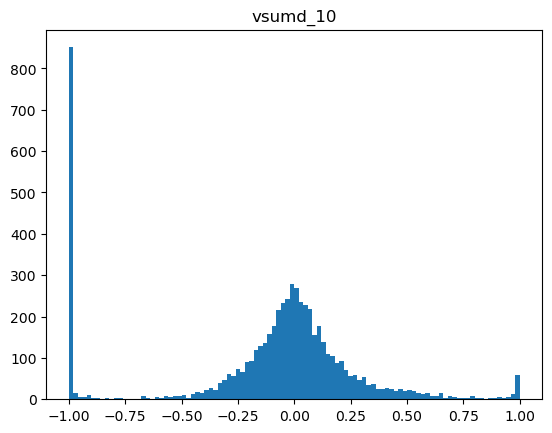

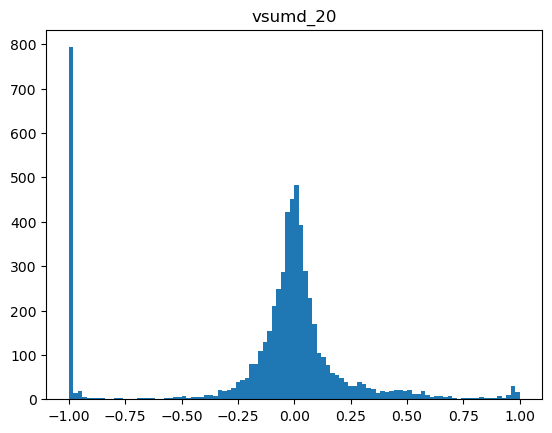

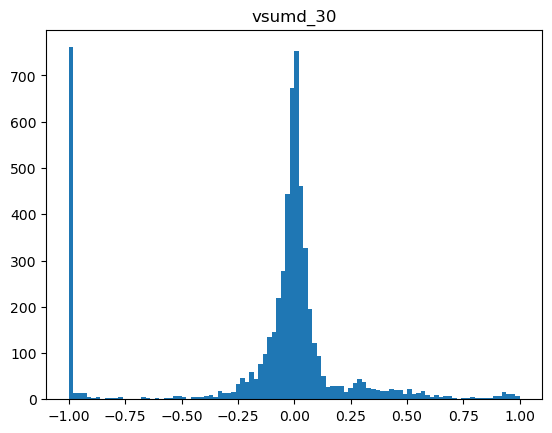

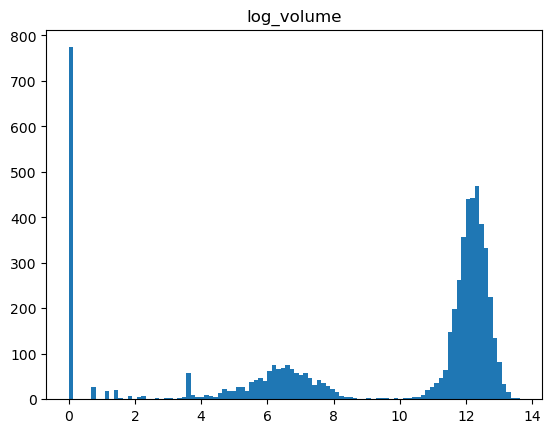

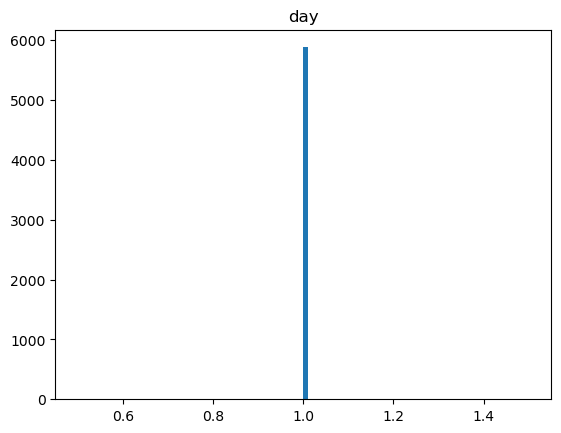

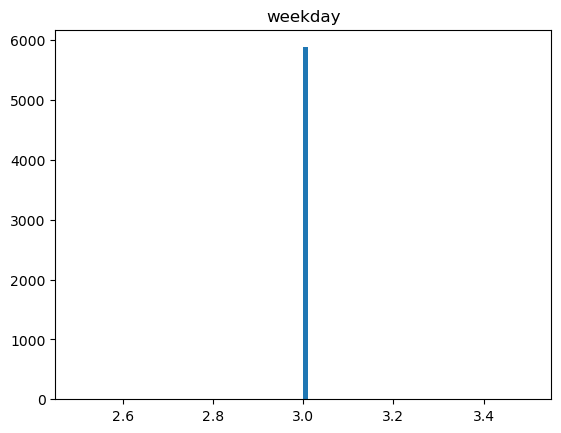

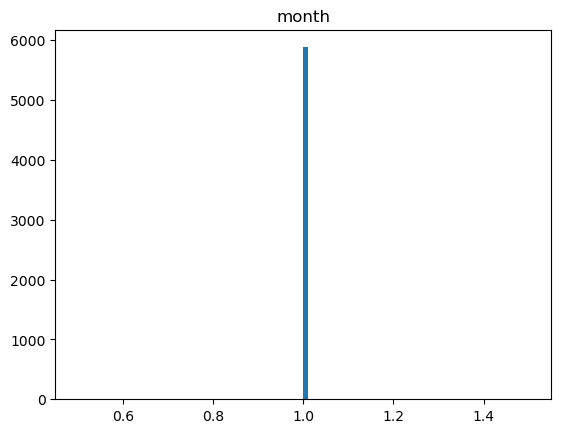

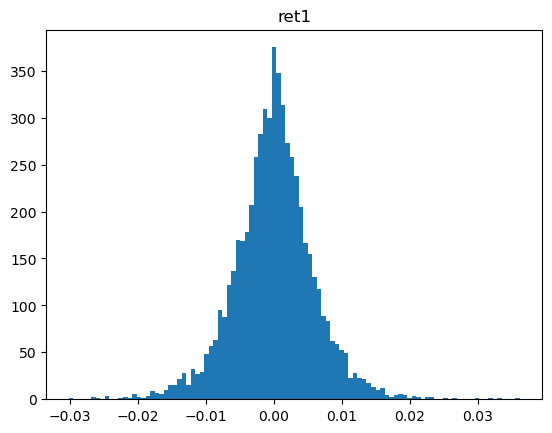

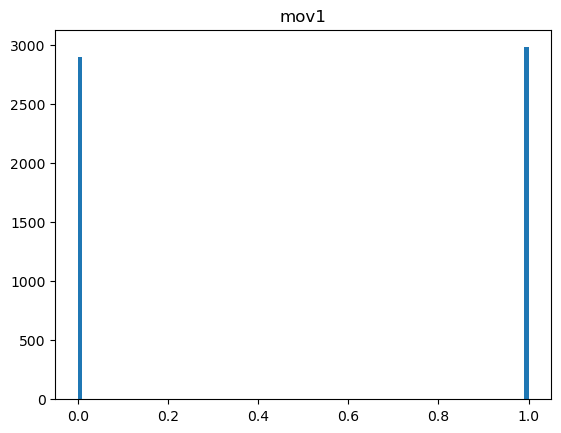

In [3]:
# plot histogram for each feature
import matplotlib.pyplot as plt
for col in data.columns:
    plt.hist(data[col], bins=100)
    plt.title(col)
    plt.show()